In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'

#suffix = 'BDT_v1_goodVtx_v10'
suffix = 'BDT_v4_goodVtx_v10_Tight'

In [3]:
# Signal
sig_histo = util.load(f'{prefix}/signal_{suffix}.coffea')[0]

In [4]:
# Background
bkg_histo = util.load(f'{prefix}/bkg_{suffix}.coffea')[0]

## Signal

In [5]:
sig_samples = list(sig_histo['cutflow'].keys())
si = pd.DataFrame.from_dict({s:ptools.signalPoint(s) for s in sig_samples}, orient='index')

In [6]:
cutnames = utils.get_signal_list_of_cuts(sig_histo)
cutnames

['Preselections',
 'n(good vertex) > 0',
 'No b-tagged jets',
 'Leading jet |eta| < 2.4',
 'Leading jet pT > 80 GeV',
 'dPhi(MET,leading jet) > 2.0',
 'dPhi(MET,all jets) > 0.75',
 'BDT']

In [7]:
# Efficiency
pd.options.display.float_format = '{:,.6f}'.format
eff_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow')

In [8]:
table = eff_cutflow
table.columns = cutnames

In [9]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Efficiency'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Efficiency.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Efficiency.csv


In [10]:
# Weighted event count
pd.options.display.float_format = '{:,.4f}'.format
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

In [11]:
table = cts_cutflow
table.columns = cutnames

In [12]:
# ctau = 1mm
ct = 1.0

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

Preselections  n(good vertex) > 0  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1         44.1691             27.0355   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1       1,156.9315            653.3357   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1       1,457.7156            809.7825   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1         74.7132             45.1167   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1       1,964.2733          1,075.5539   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1       2,725.2304          1,439.8035   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        1,620.1785            694.2471   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      33,765.0692         11,067.0622   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1        167.4818            104.9556   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1       4,184.6540          2,184.5614   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1         403.5456            240.4910   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1       9,916.8019          5,240.2710   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1      38,528.4000         22,462.4677   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1      20,174.8511         10,154.7449   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1         734.2812            410.3462   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1      17,929.3616          8,605.9181   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1         937.0399            487.6645   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1        34.0246             20.9366   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1      22,229.4245          9,521.0071   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1       928.4857            531.4454   

                                       No b-tagged jets  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1            23.2497   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1            565.9179   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1            701.1258   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1            38.8657   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1            919.8550   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1          1,246.5330   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1             599.8579   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1          9,652.4573   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1            89.1995   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1          1,886.2087   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1            207.5223   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1          4,532.9747   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1         19,557.7102   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1          8,947.3214   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1            358.0908   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1          7,378.6589   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1            422.5567   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1           18.0524   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1          8,120.8644   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1          452.7220   

                                       Leading jet |eta| < 2.4  \
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1                   22.6538   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1                   550.5692   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1                   682.4434   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1                   37.6616   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1                   896.4311   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1                 1,211.0406   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1                    580.8584   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1                 9,369.6270   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1                   86.8710   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1                 1,836.7246   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1                   202.1959   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1                 4,409.4381   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1                18,997.3499   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1                 8,757.1963   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1                   347.8297   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1                 7,194.5895   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1                   409.6557   
sig_2018_Mchi-

In [13]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_EventCount_Weighted'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_EventCount_Weighted.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_EventCount_Weighted.csv


In [14]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [15]:
# Raw count
pd.options.display.float_format = '{:,.4f}'.format
raw_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_nevts')

In [16]:
# Per ctau
for ct in [1, 10, 100]:
    points = (si["ctau"] == ct)
    
    df = table.loc[list(si[points].name)]

    outdir = './csv/Cutflow/Efficiency/'
    outname = f'SR_Signal_ctau-{int(ct)}_samples_Raw'
    
    df_to_save = df
    
    utils.save_df_to_csv(df_to_save, outdir, outname, isSignal=True)

Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-1_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-10_samples_Raw.csv
Saved: ./csv/Cutflow/Efficiency//SR_Signal_ctau-100_samples_Raw.csv


['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m5to40.png


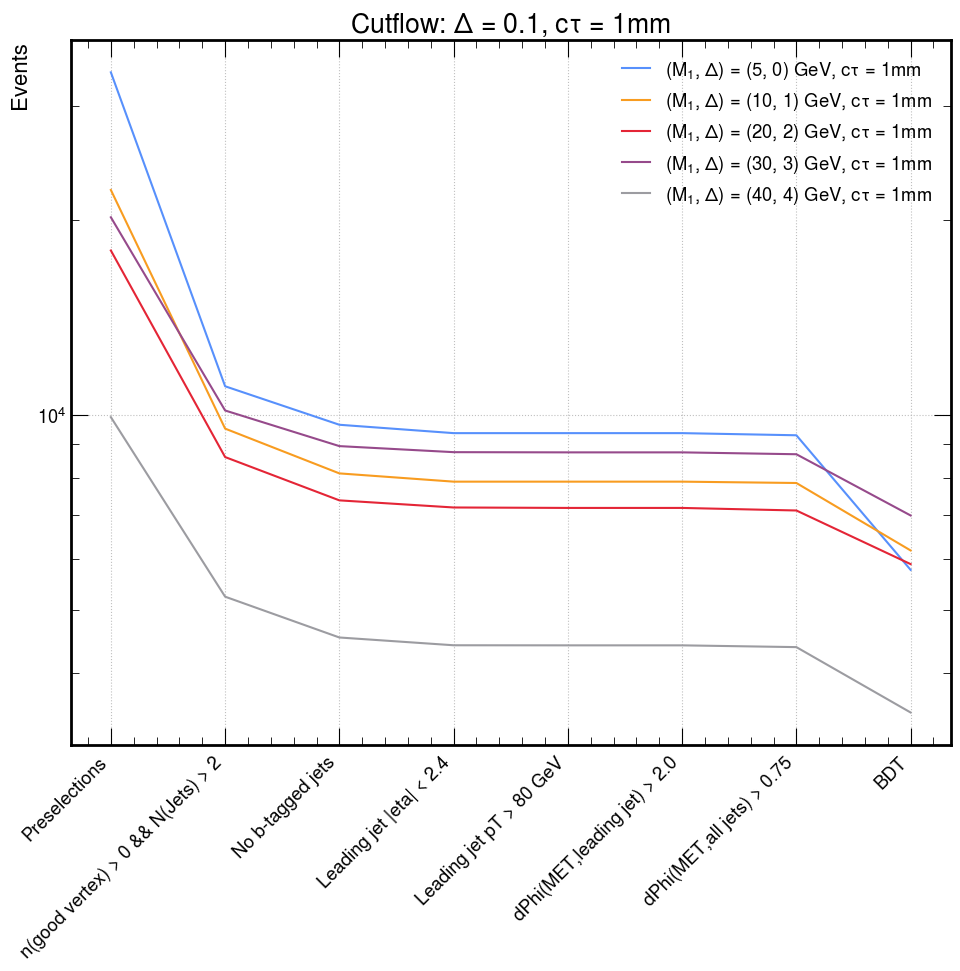

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m5to40.png


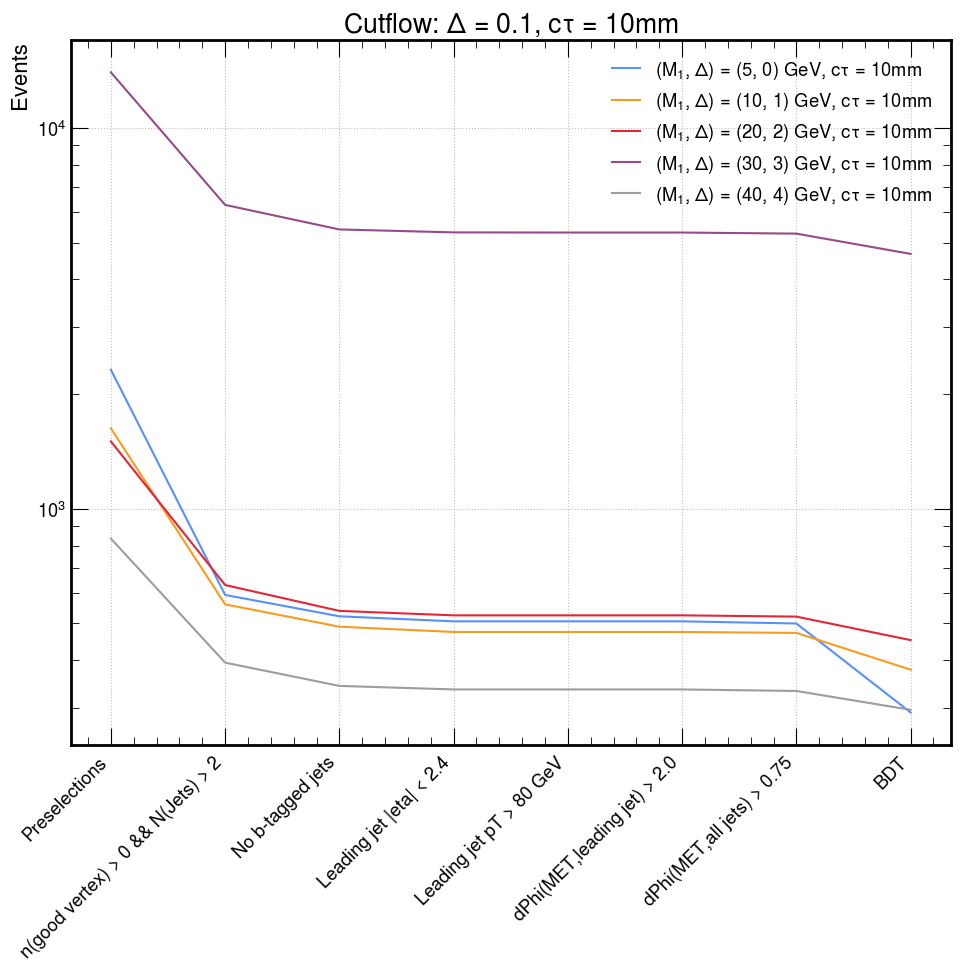

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m5to40.png


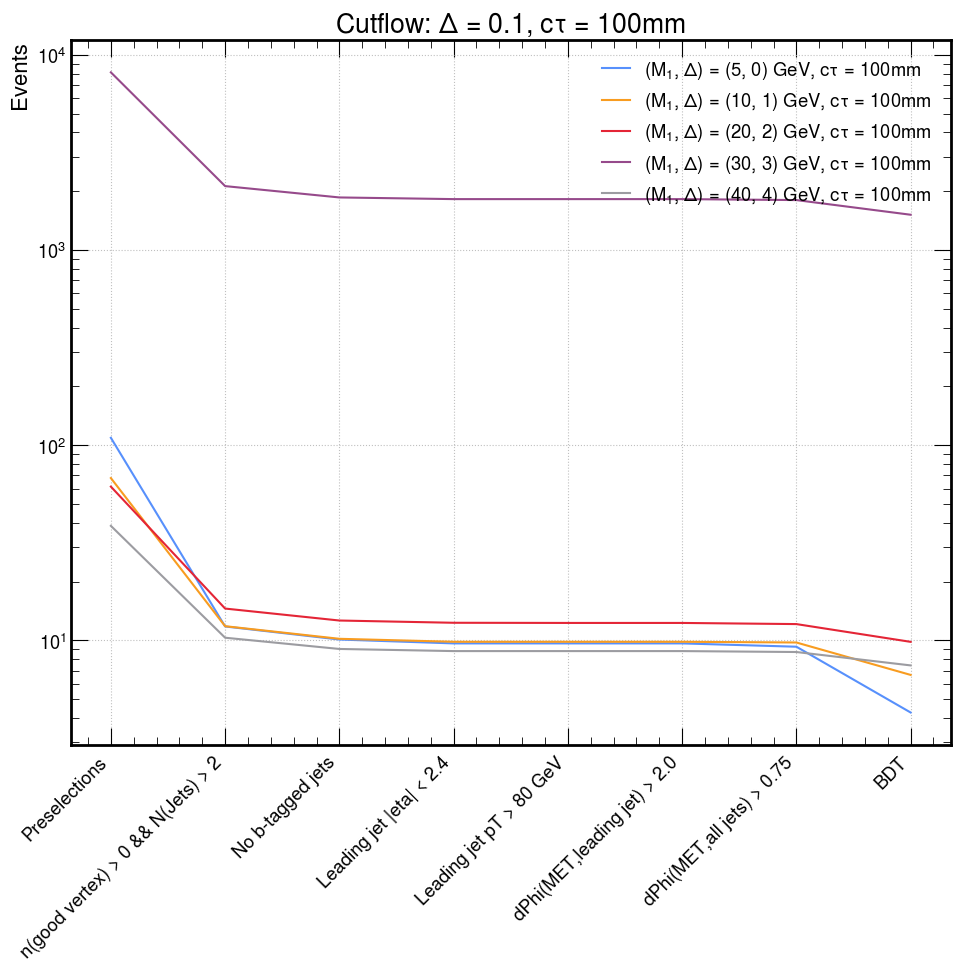

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m5to40.png


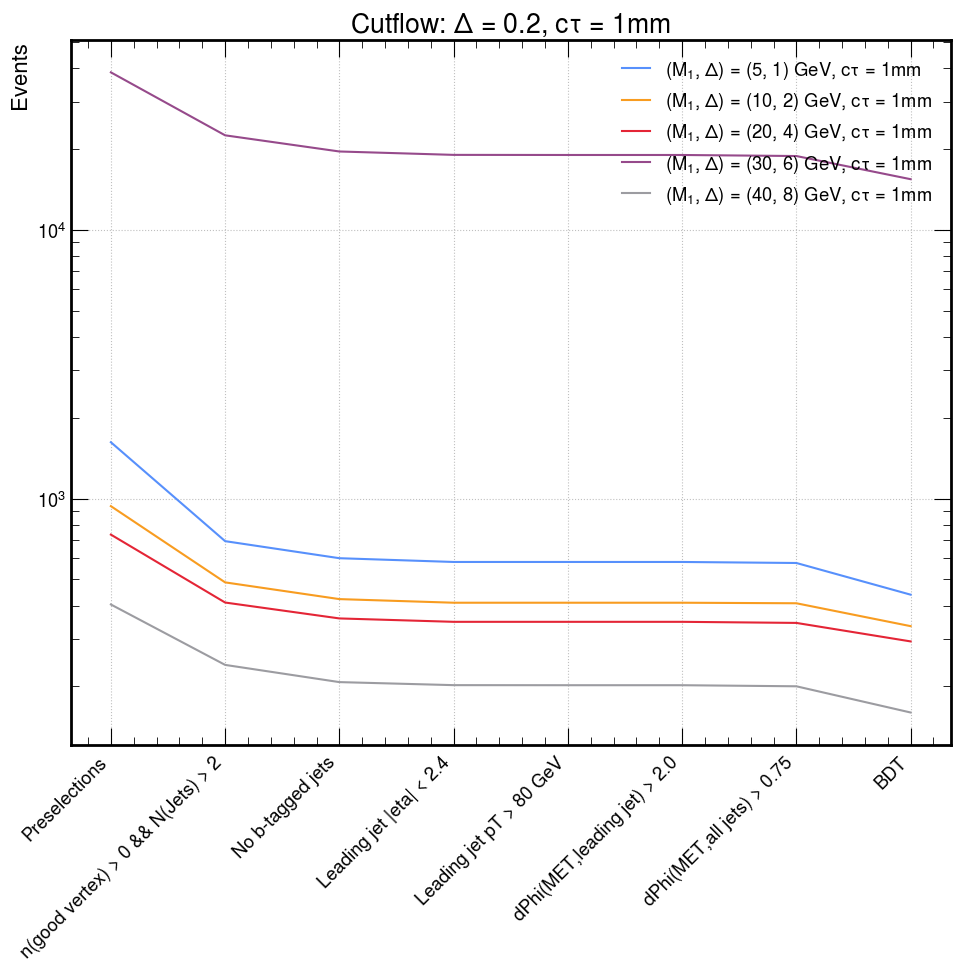

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m5to40.png


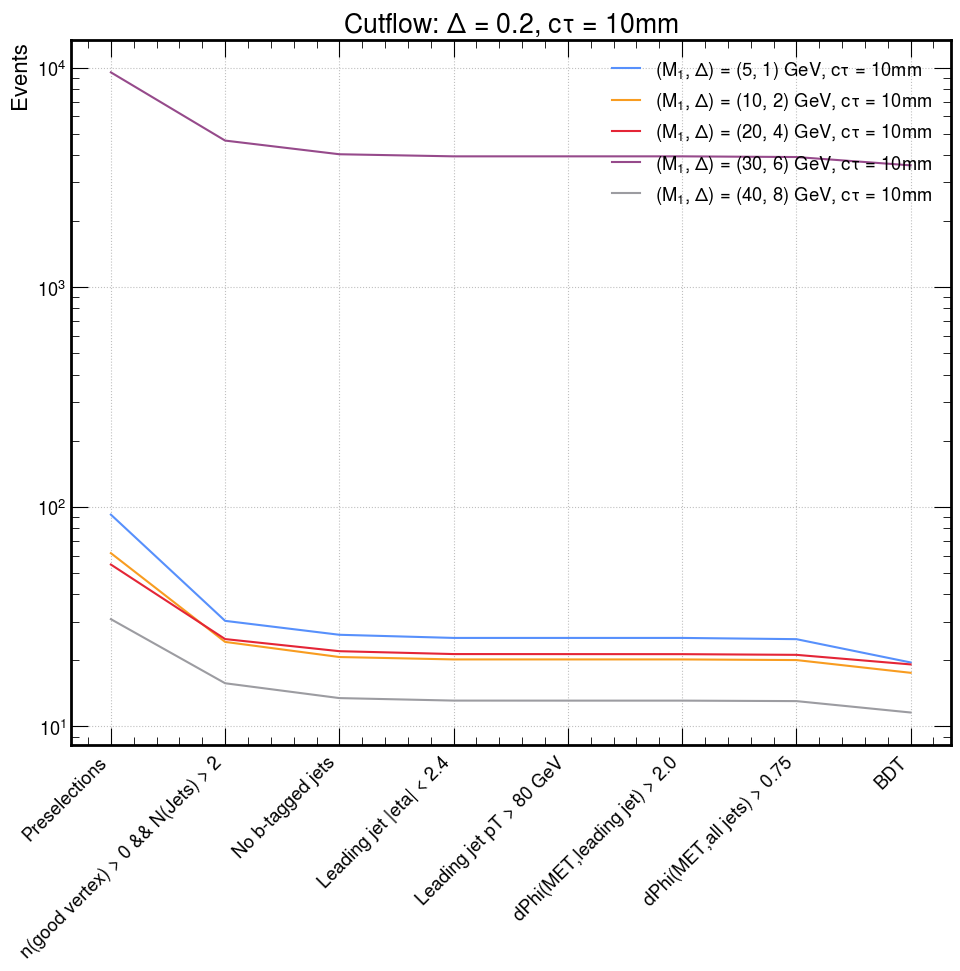

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m5to40.png


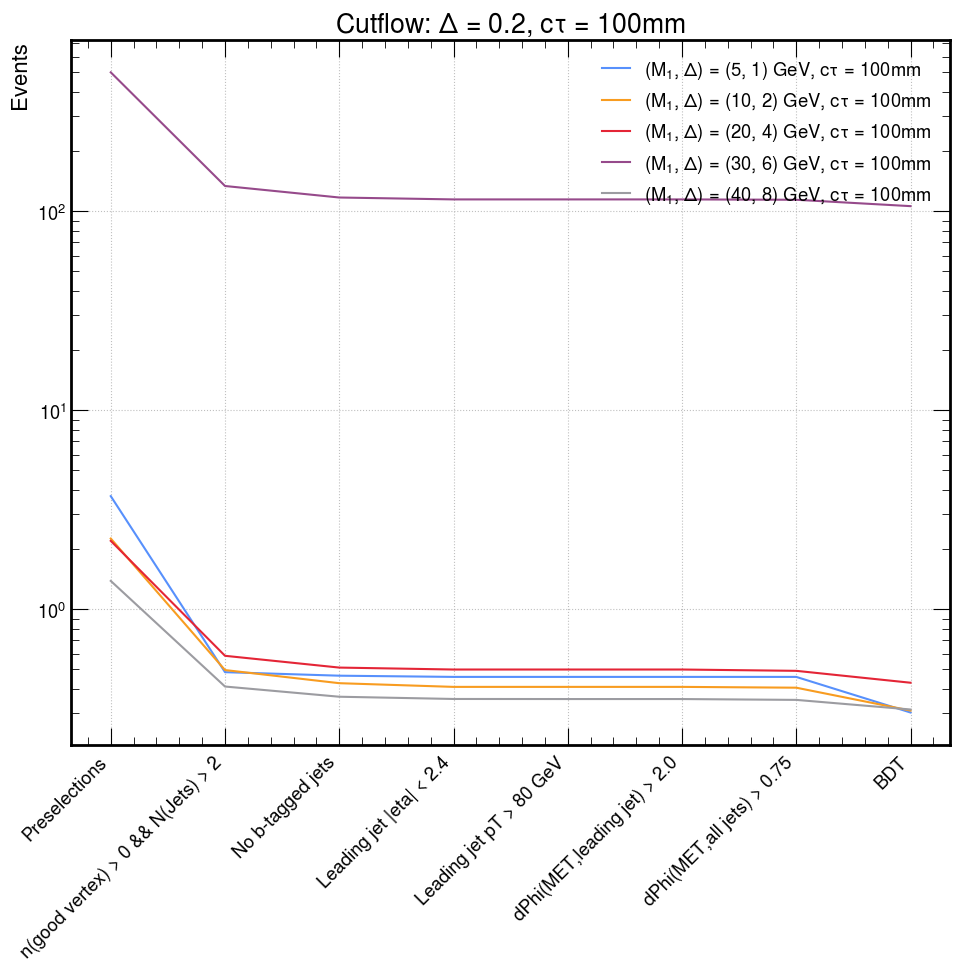

In [17]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [5, 10, 20, 30, 40],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m5to40.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


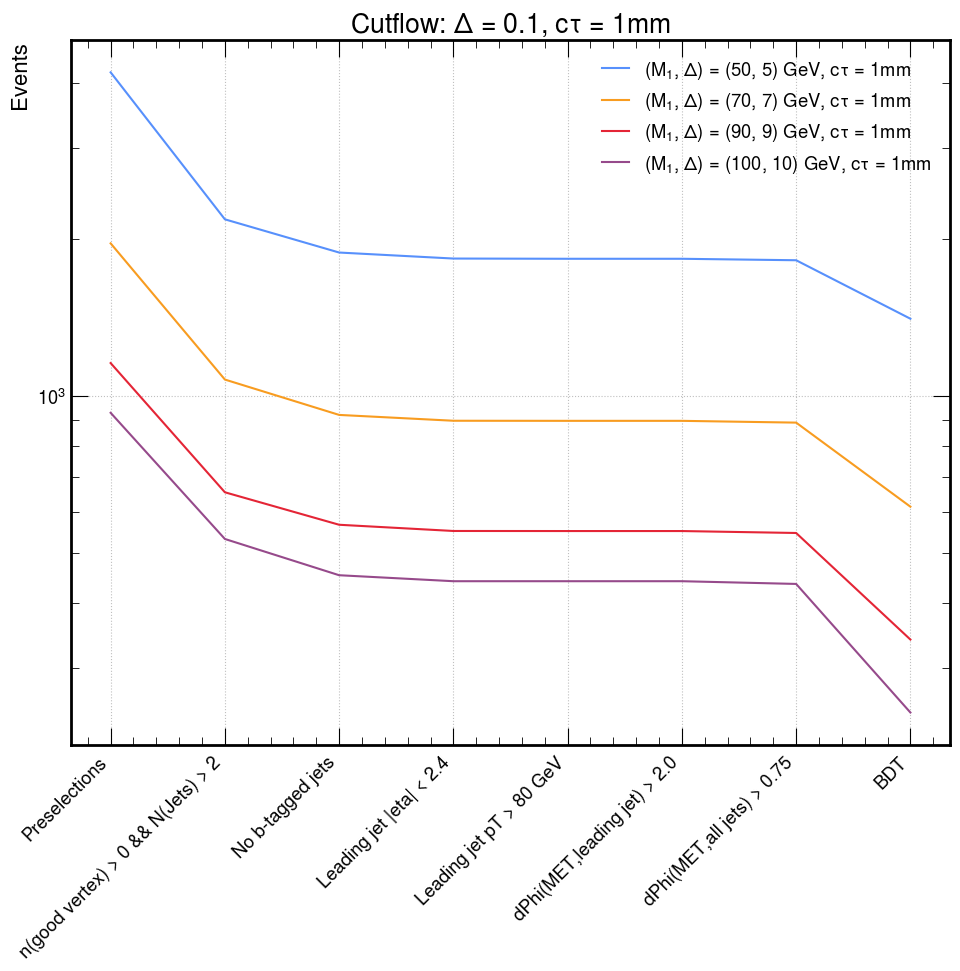

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


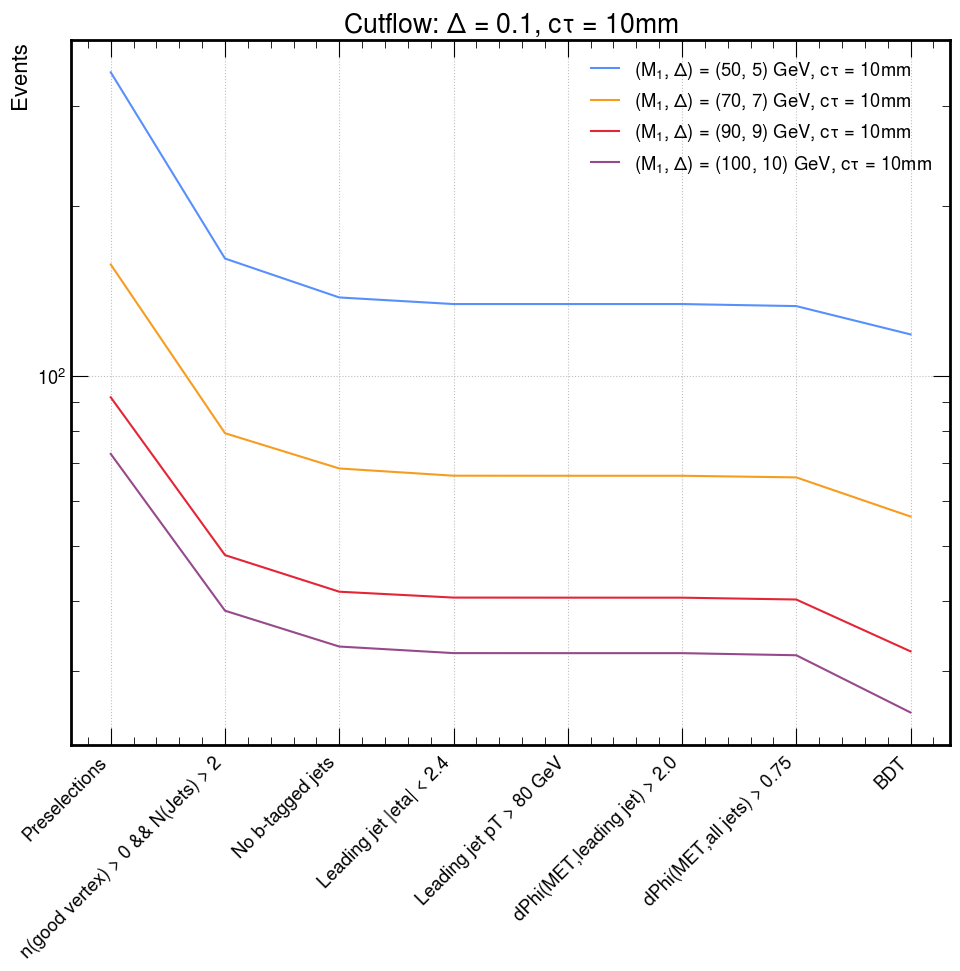

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


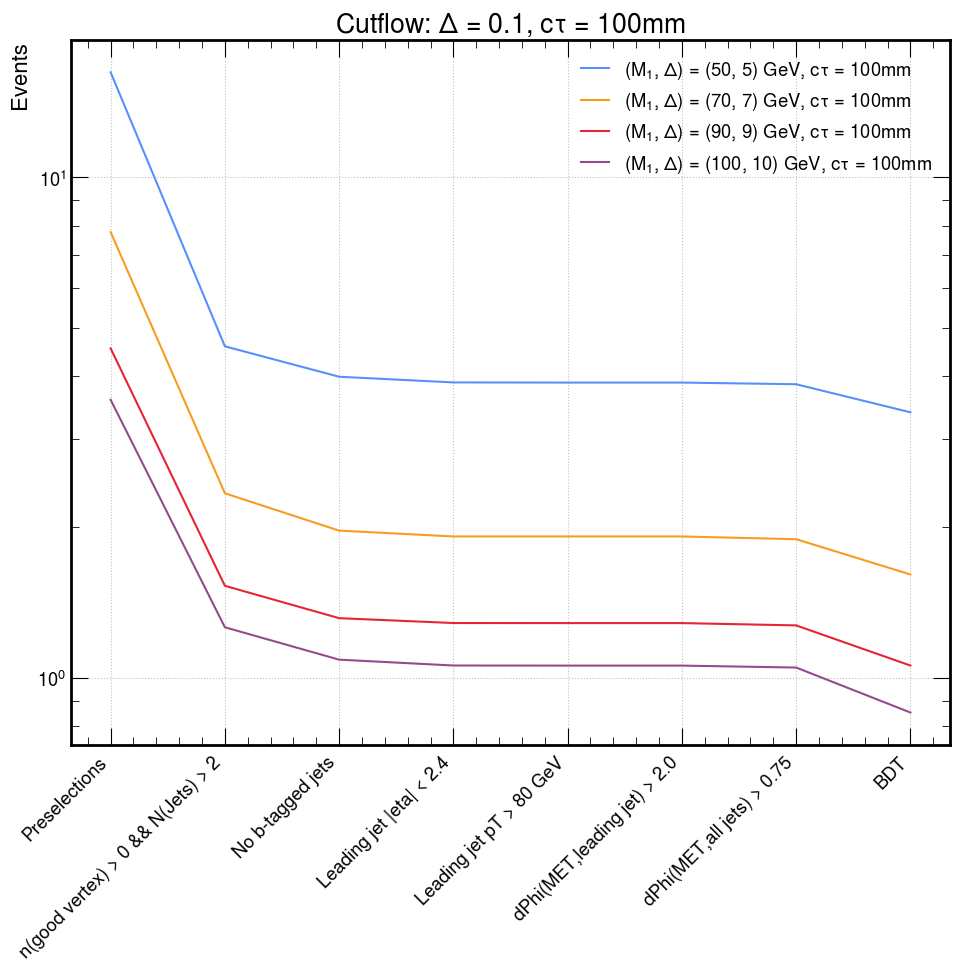

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


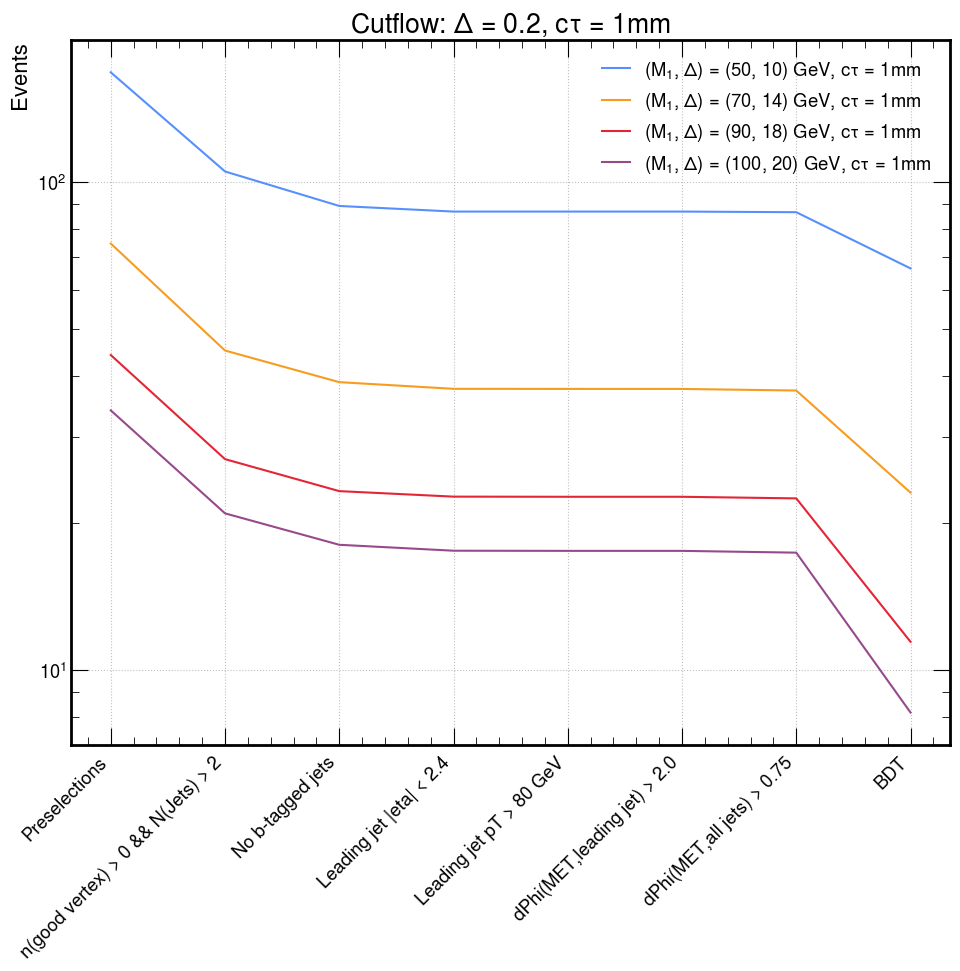

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


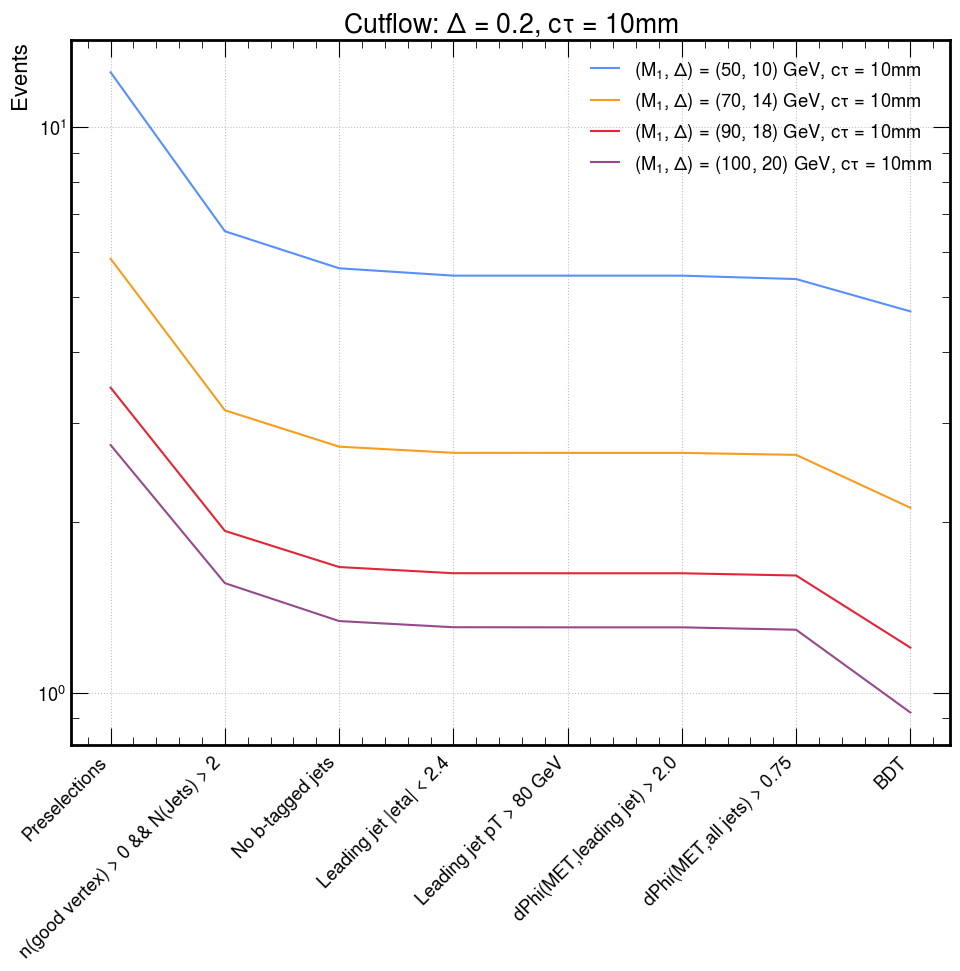

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


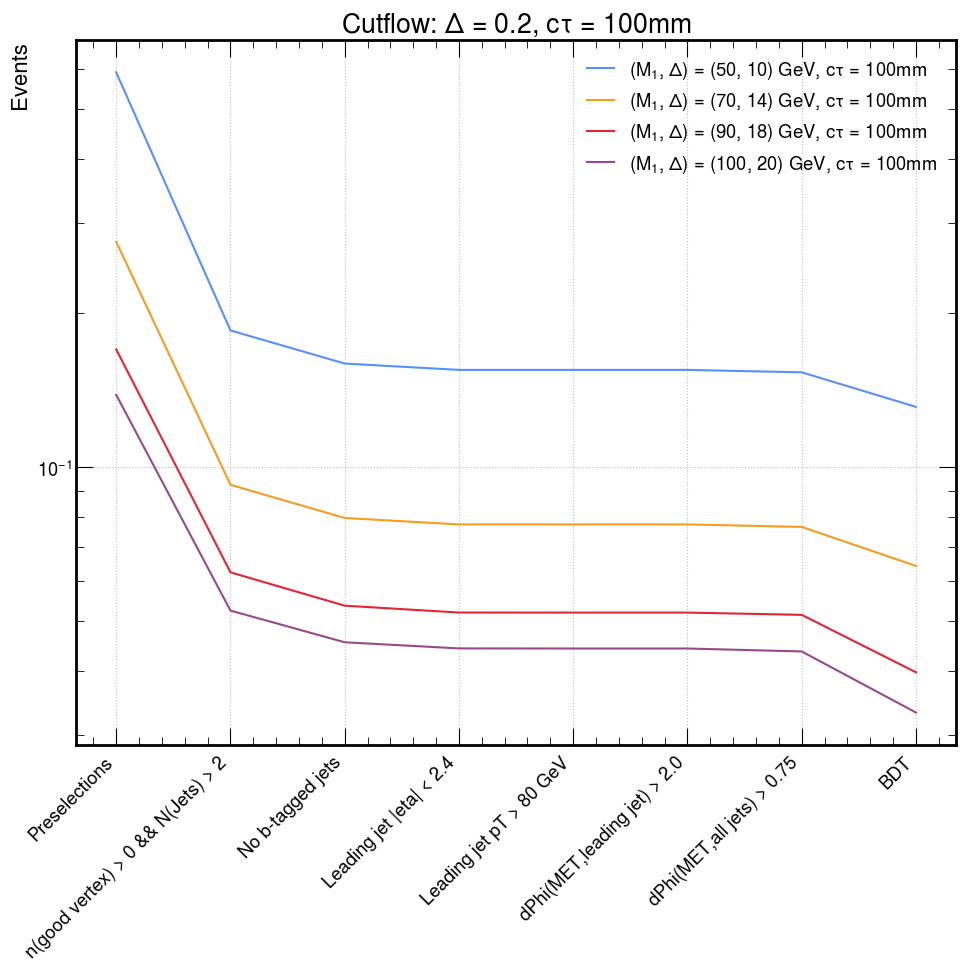

In [18]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [50, 70, 90, 100],
    'deltas': [0.1],
    'ctaus': [1],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## Background

In [19]:
# efficiency
pd.options.display.float_format = '{:,.8f}'.format

bkg_eff_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow')
bkg_eff_df

Preselections  n(good vertex) > 0  No b-tagged jets  \
Multiboson     0.00065832          0.00002550        0.00001943   
QCD            0.00000249          0.00000001        0.00000000   
WJets          0.00101318          0.00001998        0.00001606   
Top            0.00039885          0.00000872        0.00000533   
ZJets          0.00242159          0.00004092        0.00003357   
DY             0.00018701          0.00000911        0.00000722   
ZGamma         0.00032468          0.00001085        0.00000951   
Total          0.00001696          0.00000030        0.00000023   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
Multiboson               0.00001770               0.00001533   
QCD                      0.00000000               0.00000000   
WJets                    0.00001539               0.00001518   
Top                      0.00000477               0.00000445   
ZJets                    0.00003212               0.00003188   
DY                       0.00000702               0.00000697   
ZGamma                   0.00000847               0.00000709   
Total                    0.00000022               0.00000022   

            dPhi(MET,leading jet) > 2.0  dPhi(MET,all jets) > 0.75        BDT  
Multiboson                   0.00001472                 0.00001434 0.00000000  
QCD                          0.00000000                 0.00000000 0.00000000  
WJets                        0.00001511                 0.00001417 0.00000013  
Top                          0.00000439                 0.00000414 0.00000004  
ZJets                        0.00003179                 0.00003005 0.00000047  
DY                           0.00000692                 0.00000637 0.00000020  
ZGamma                       0.00000721                 0.00000723 0.00000000  
Total                        0.00000022                 0.00000020 0.00000000

In [20]:
# Save as csv
outdir = f'./csv/{suffix}/Cutflow/Efficiency/'
outname = f'Background_Efficiency'

df_to_save = bkg_eff_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v10_Tight/Cutflow/Efficiency//Background_Efficiency.csv


In [21]:
# weighted event count
pd.options.display.float_format = '{:,.2f}'.format
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts', isLegacy = False)

bkg_cts_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

Preselections  n(jet) > 2 && n(good vertex) > 0  No b-tagged jets  \
Multiboson       4,588.16                            177.76            135.42   
QCD             53,432.27                            143.90             73.61   
WJets          214,692.24                          4,234.00          3,402.86   
Top             26,174.93                            572.21            349.98   
ZJets           63,745.58                          1,077.24            883.75   
DY               5,819.49                            283.63            224.70   
ZGamma           1,665.13                             55.64             48.78   
Total          370,117.80                          6,544.37          5,119.10   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
Multiboson                   123.37                   106.85   
QCD                           43.30                    43.30   
WJets                      3,260.74                 3,217.36   
Top                          312.94                   292.06   
ZJets                        845.40                   839.25   
DY                           218.46                   216.97   
ZGamma                        43.44                    36.34   
Total                      4,847.66                 4,752.13   

            dPhi(MET,leading jet) > 2.0  dPhi(MET,all jets) > 0.75   BDT  
Multiboson                       102.62                      99.94  0.00  
QCD                               38.85                      16.05  0.00  
WJets                          3,202.03                   3,002.86 26.87  
Top                              288.39                     271.38  2.95  
ZJets                            836.83                     791.02 12.33  
DY                               215.32                     198.30  6.10  
ZGamma                            36.98                      37.07  0.00  
Total                          4,721.01                   4,416.62 48.25

In [22]:
# Save to csv
outdir = f'./csv/{suffix}/Cutflow/EventCount_Weighted/'
outname = f'Background_EventCount_Weighted'

df_to_save = bkg_cts_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v10_Tight/Cutflow/EventCount_Weighted//Background_EventCount_Weighted.csv


In [23]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df

Preselections  n(good vertex) > 0  No b-tagged jets  \
Multiboson          25187                 989               749   
QCD                 31490                  53                14   
WJets             1177020               11371              8501   
Top                703976               14988              8943   
ZJets              738994                6747              5290   
DY                 296131                5911              3794   
ZGamma               6506                 231               182   
Total             2979304               40290             27473   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
Multiboson                      682                      576   
QCD                              13                       13   
WJets                          8219                     8116   
Top                            7951                     7307   
ZJets                          5122                     5081   
DY                             3742                     3731   
ZGamma                          170                      151   
Total                         25899                    24975   

            dPhi(MET,leading jet) > 2.0  dPhi(MET,all jets) > 0.75  BDT  
Multiboson                          533                        512    0  
QCD                                  12                          2    0  
WJets                              8002                       7119   63  
Top                                7135                       6664   54  
ZJets                              5019                       4378   59  
DY                                 3580                       2830   61  
ZGamma                              143                        133    0  
Total                             24424                      21638  237

In [24]:
# raw event count
pd.options.display.float_format = '{:,.0f}'.format
bkg_cts_raw_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_nevts', isLegacy = False)

bkg_cts_raw_df.rename(columns={'n(good vertex) > 0': 'n(jet) > 2 && n(good vertex) > 0'})

Preselections  n(jet) > 2 && n(good vertex) > 0  No b-tagged jets  \
Multiboson          25187                               989               749   
QCD                 31490                                53                14   
WJets             1177020                             11371              8501   
Top                703976                             14988              8943   
ZJets              738994                              6747              5290   
DY                 296131                              5911              3794   
ZGamma               6506                               231               182   
Total             2979304                             40290             27473   

            Leading jet |eta| < 2.4  Leading jet pT > 80 GeV  \
Multiboson                      682                      576   
QCD                              13                       13   
WJets                          8219                     8116   
Top                            7951                     7307   
ZJets                          5122                     5081   
DY                             3742                     3731   
ZGamma                          170                      151   
Total                         25899                    24975   

            dPhi(MET,leading jet) > 2.0  dPhi(MET,all jets) > 0.75  BDT  
Multiboson                          533                        512    0  
QCD                                  12                          2    0  
WJets                              8002                       7119   63  
Top                                7135                       6664   54  
ZJets                              5019                       4378   59  
DY                                 3580                       2830   61  
ZGamma                              143                        133    0  
Total                             24424                      21638  237

In [25]:
outdir = f'./csv/{suffix}/Cutflow/EventCount_Raw/'
outname = f'Background_EventCount_Raw'

df_to_save = bkg_cts_raw_df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/BDT_v4_goodVtx_v10_Tight/Cutflow/EventCount_Raw//Background_EventCount_Raw.csv


In [26]:
nBkg = bkg_cts_df.loc['Total'][-1]

print(f'Total number of backgrounds (weighted) after the last SR cut: {nBkg:.2f}')

Total number of backgrounds (weighted) after the last SR cut: 48.25


In [27]:
pd.options.display.float_format = '{:,.2f}'.format

bkg_composition = pd.concat([pd.DataFrame(bkg_cts_df[bkg_cts_df.columns.values[-1]]).transpose(), pd.DataFrame(bkg_cts_raw_df[bkg_cts_df.columns.values[-1]]).transpose()], ignore_index=True)

bkg_composition = bkg_composition.rename(index={0: 'Weighted Counts', 1: 'Raw Counts'})
bkg_composition

Multiboson  QCD  WJets   Top  ZJets    DY  ZGamma  Total
Weighted Counts        0.00 0.00  26.87  2.95  12.33  6.10    0.00  48.25
Raw Counts             0.00 0.00  63.00 54.00  59.00 61.00    0.00 237.00

Saved: ./plots/BDT_v4_goodVtx_v10_Tight/cutflow//Cutflow_background.png


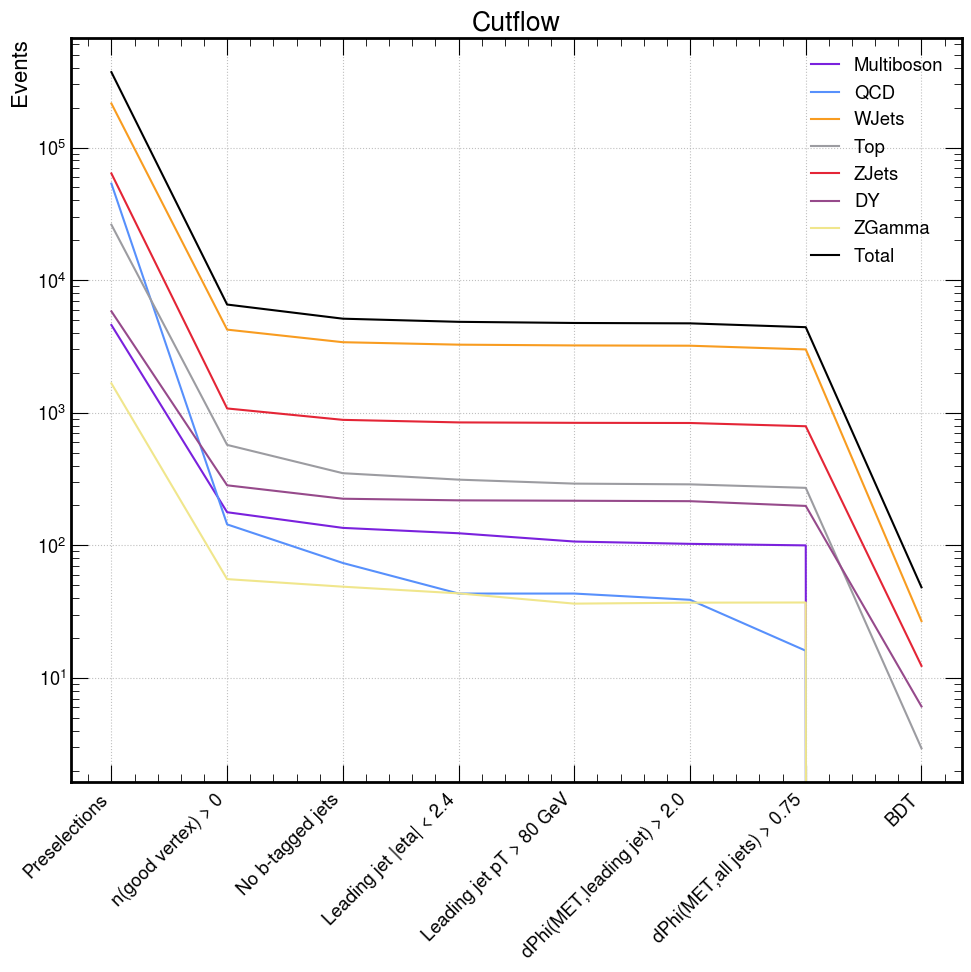

In [28]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

Saved: ./plots/BDT_v4_goodVtx_v10_Tight/cutflow//Cutflow_background.png


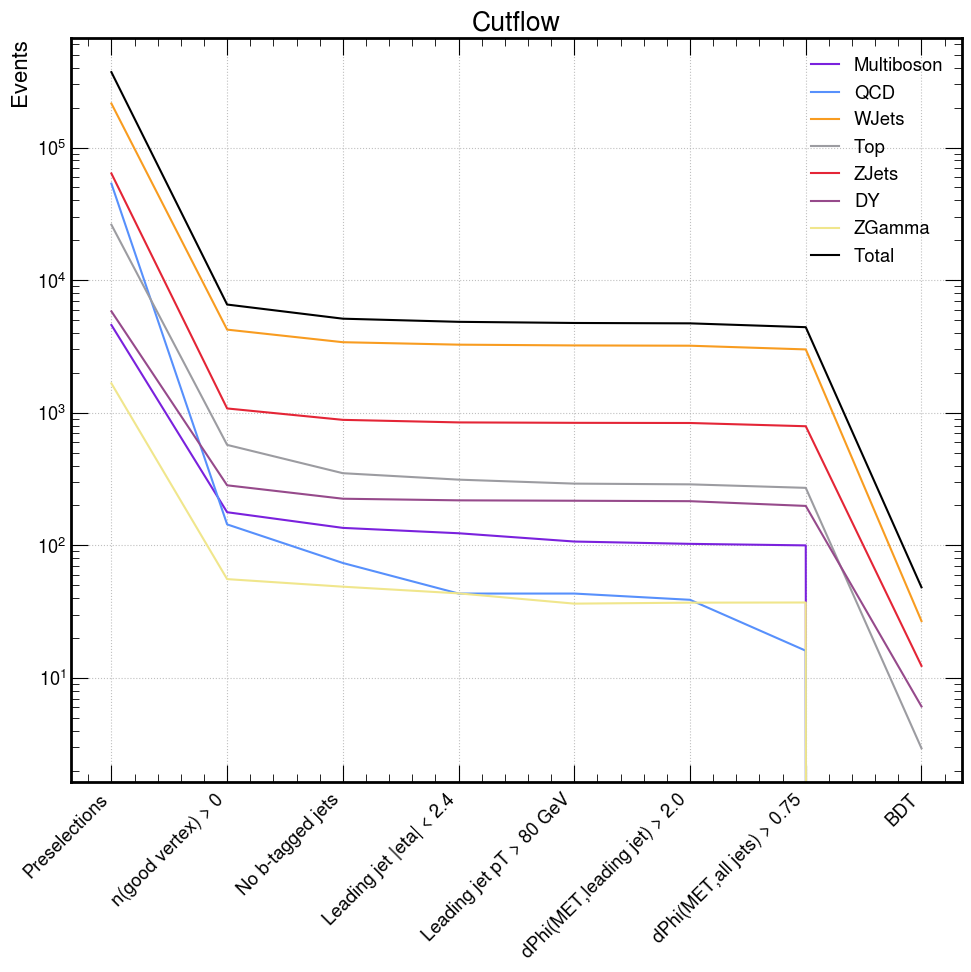

In [29]:
df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_bkg_eff = {
    # Select processes
    'processes': 'all', # Otherwise, give as a list; ['WJets', 'ZJets', 'Total']

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': f'./plots/{suffix}/cutflow/',
    'outName': f'Cutflow_background.png'
}

# For all processes
ptools.plot_bkg_efficiency(bkg_histo, df, plot_dict_bkg_eff)

In [46]:
cuts = utils.get_signal_list_of_cuts(sig_histo)

cuts[1] = 'n(good vertex) > 0 && 0 < N(Jets) < 3'
cuts[2] = 'b-jet veto loose WP'
cuts[3] = r"Leading jet $p_{T} > 80$ GeV"
cuts[4] = r"Leading jet $|\eta| < 2.4$"
cuts[5] = r"$|\Delta\phi(p_{T}^{miss},$leading jet)$| > 2.0$"
cuts[6] = r"min$|\Delta\phi(p_{T}^{miss},$all jets)$| < 0.75$"
cuts[7] = r"Pass BDT"

print(cuts)

['Preselections', 'n(good vertex) > 0 && 0 < N(Jets) < 3', 'b-jet veto loose WP', 'Leading jet $p_{T} > 80$ GeV', 'Leading jet $|\\eta| < 2.4$', '$|\\Delta\\phi(p_{T}^{miss},$leading jet)$| > 2.0$', 'min$|\\Delta\\phi(p_{T}^{miss},$all jets)$| < 0.75$', 'Pass BDT']


In [47]:
table = cts_cutflow
table.columns = cuts

In [48]:
sig_cdict = {
    '5': "#3f90da", 
    '10': "#ffa90e", 
    '20': "#bd1f01", 
    '30': "#94a4a2", 
    '40': "#832db6", 
    '50': "#a96b59", 
    '60': "#e76300", 
    '70': "#b9ac70", 
    '80': "#717581", 
    '90': "#92dadd",
    '100': "#2ca02c"

}

In [49]:
import mplhep as hep
hep.style.use("CMS")

plt.rcParams["figure.figsize"] = (18,13)

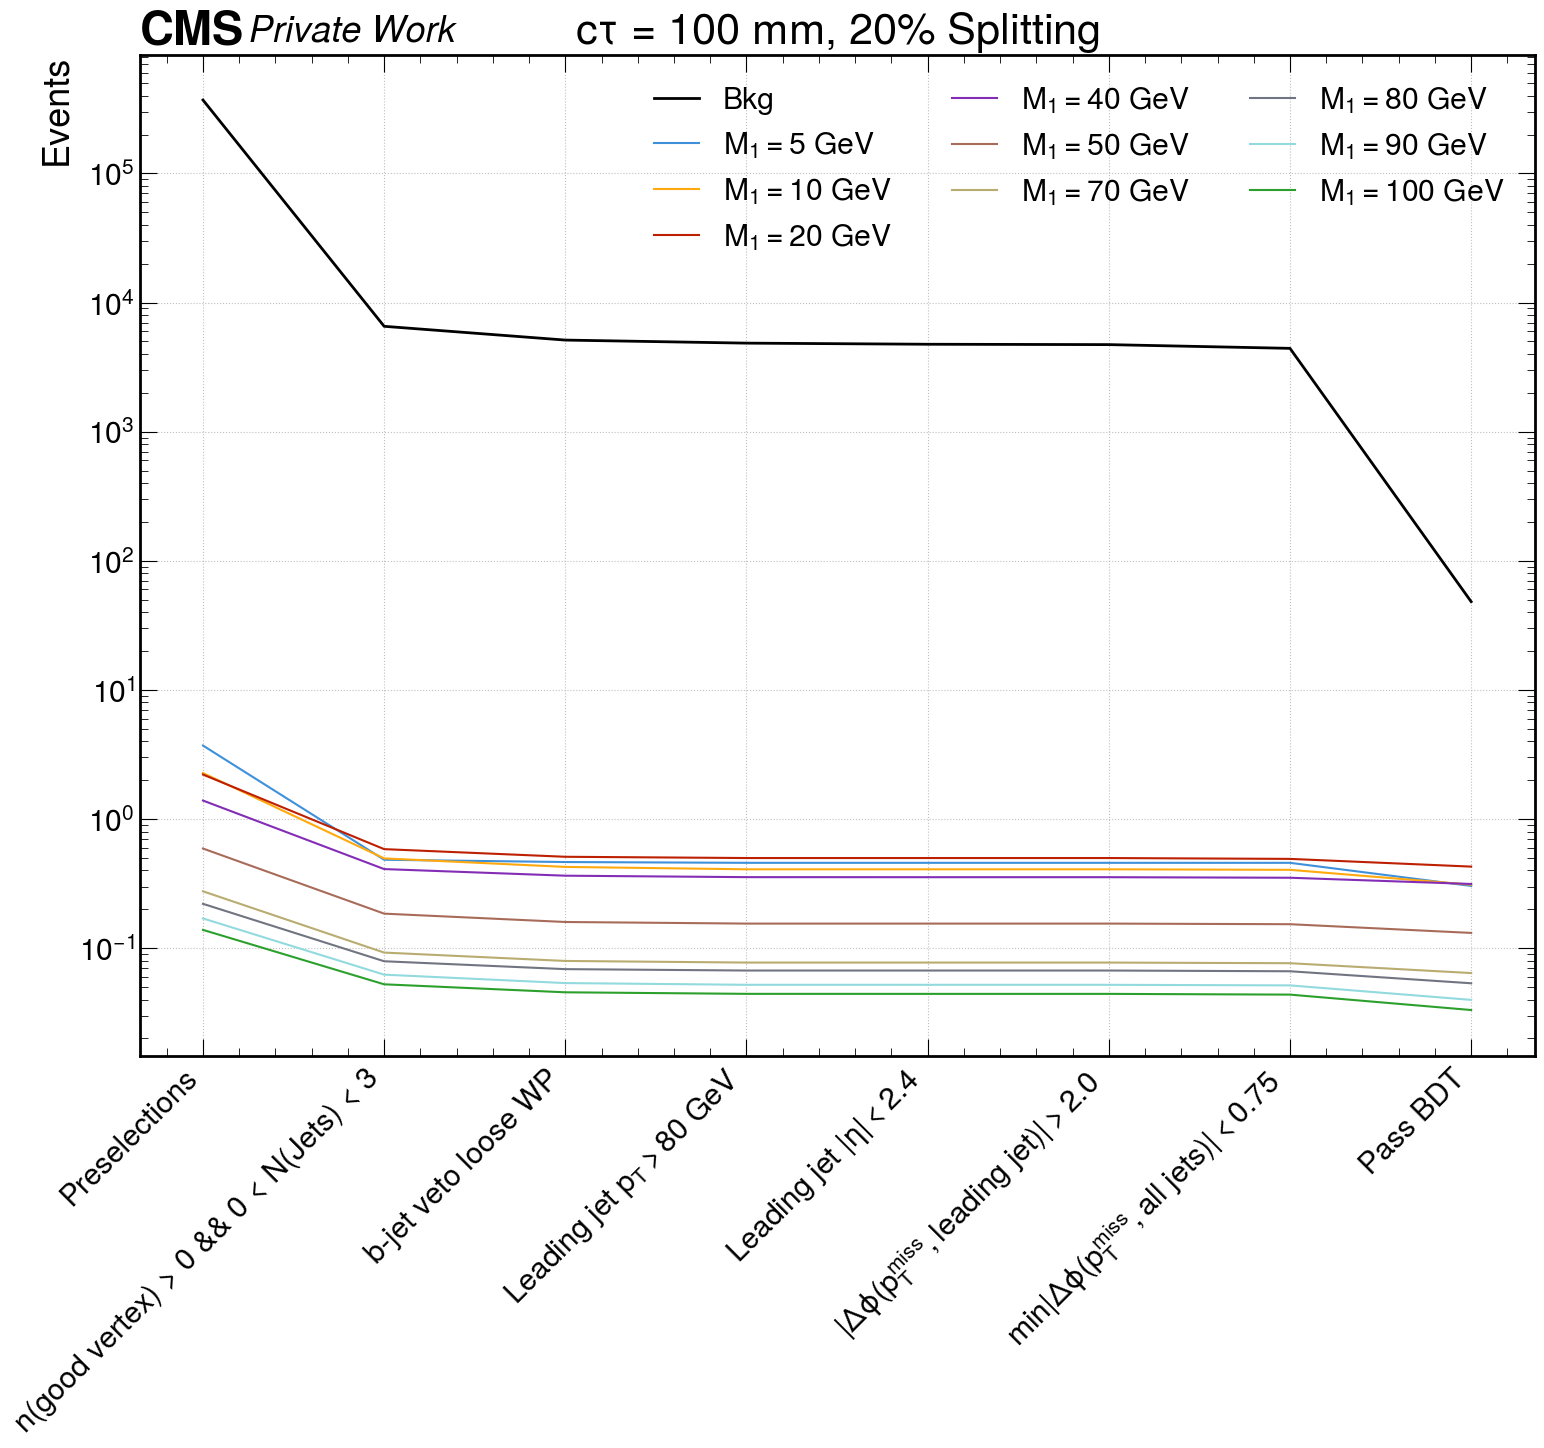

In [55]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 100
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)


for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 != 30):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=3)


plt.savefig(f'cutflow_preBDT_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

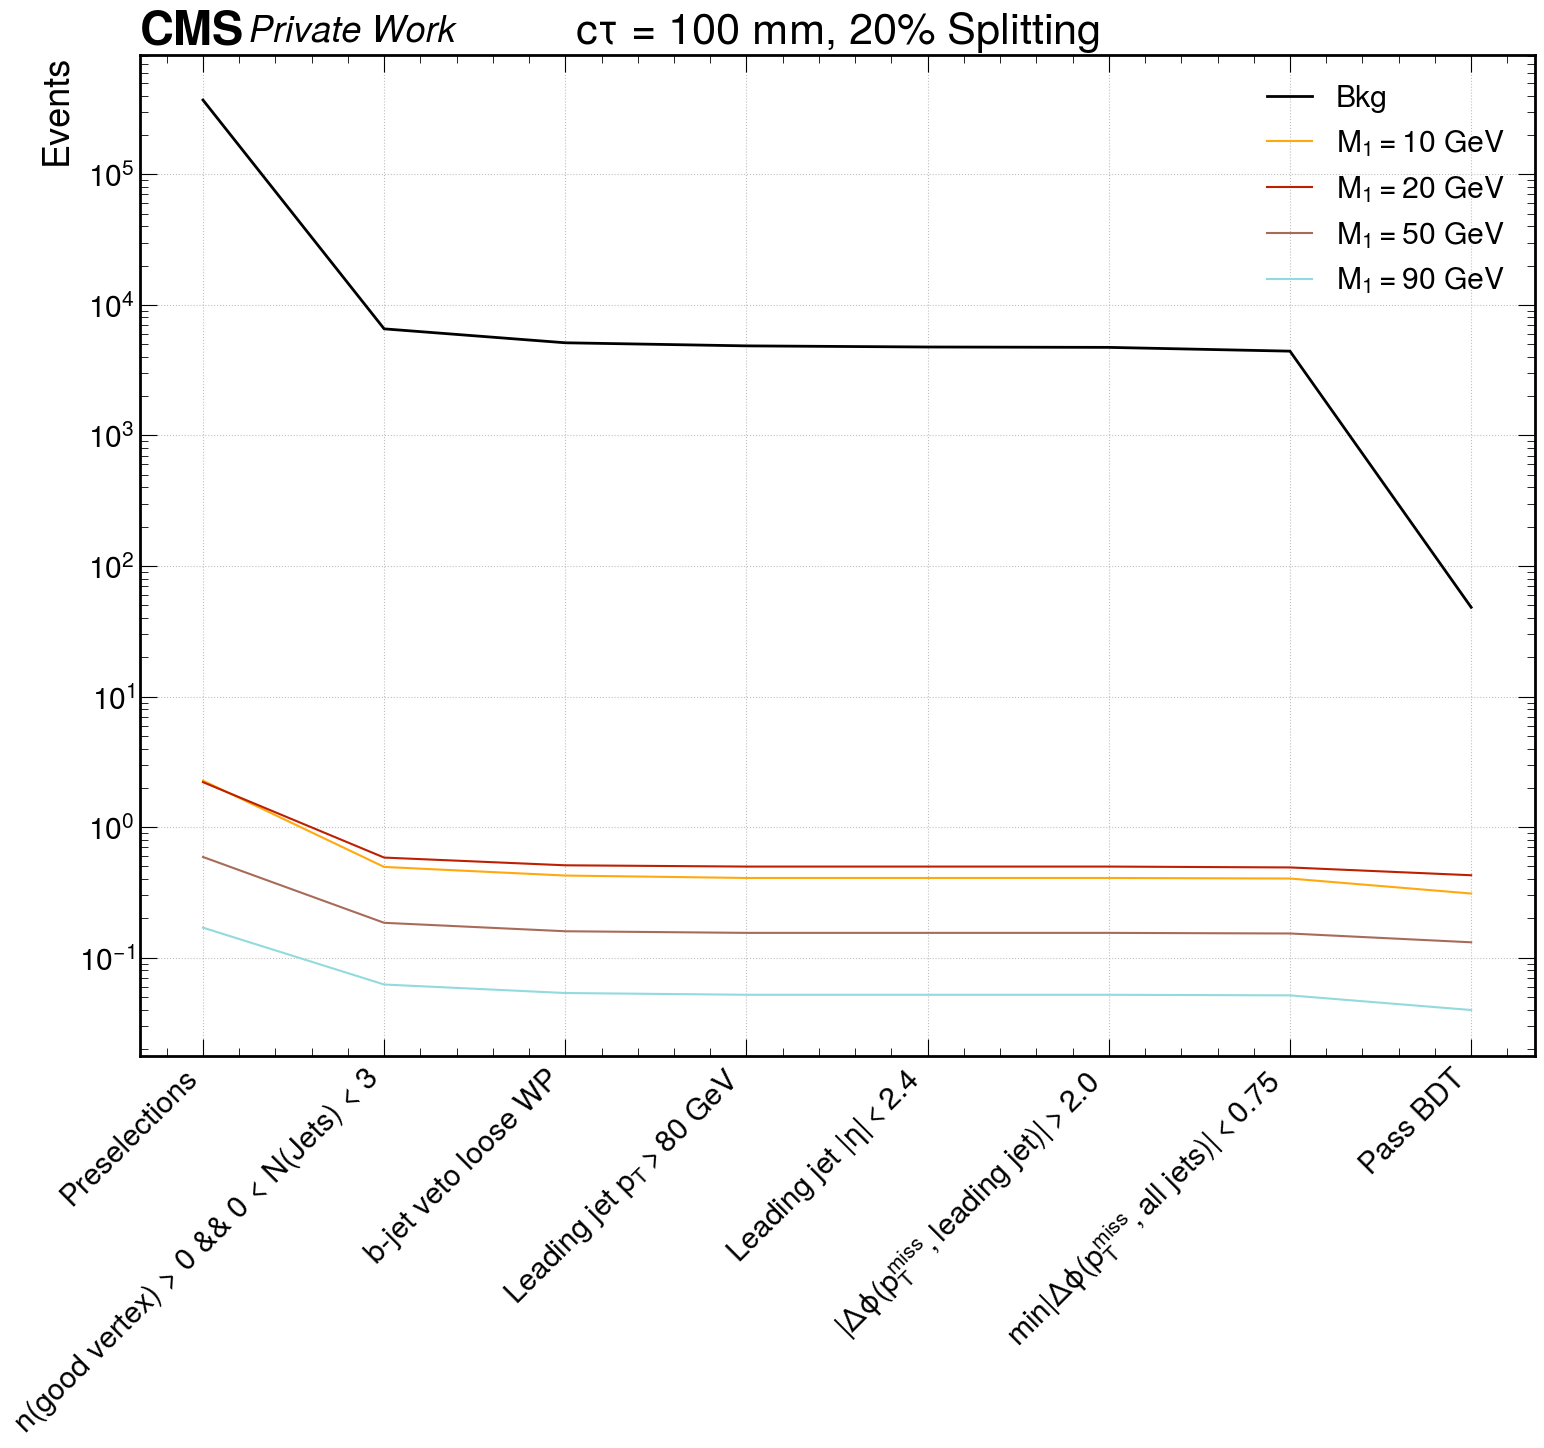

In [71]:
hep.cms.label('', data=False, llabel='Private Work', rlabel='')

ct = 100
delt = 0.2

points = (si["ctau"] == ct)

df = table.loc[list(si[points].name)]
df

m1_list = []
for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    m1_list.append(m1)

df['m1'] = m1_list
df = df.sort_values(by=['m1']) # sort by m1
df.pop('m1')

plt.plot(cuts, bkg_cts_df.loc['Total'], label='Bkg', color='black', linewidth=2)

m1s = [10, 20, 50, 90]

for point in df.index.values:
    sig_dict = ptools.signalPoint(point)
    m1 = int(sig_dict['m1'])
    delta = sig_dict['delta']
    dmchi = sig_dict['dmchi']
    ctau = int(sig_dict['ctau'])

    if (ctau == ct) and (delta == delt) and (m1 in m1s):
        #print(ctau, delta)
        plt.plot(cuts, df.loc[point], label=rf"$M_{1} = {m1:.0f}$ GeV", color=sig_cdict[str(m1)])


plt.grid()
    
plt.ylabel("Events")
plt.title(rf"c$\tau$ = {ct} mm, {int(delt*100)}% Splitting")
    
plt.xticks(ticks = np.arange(len(cuts)), labels = cuts, rotation = 45, ha = 'right')

plt.yscale('log')
plt.legend(loc='upper right', ncols=1)


plt.savefig(f'cutflow_SR_ct{ct}_delta{str(delt).replace(".","p")}.pdf', bbox_inches = "tight")

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_1_m50to100.png


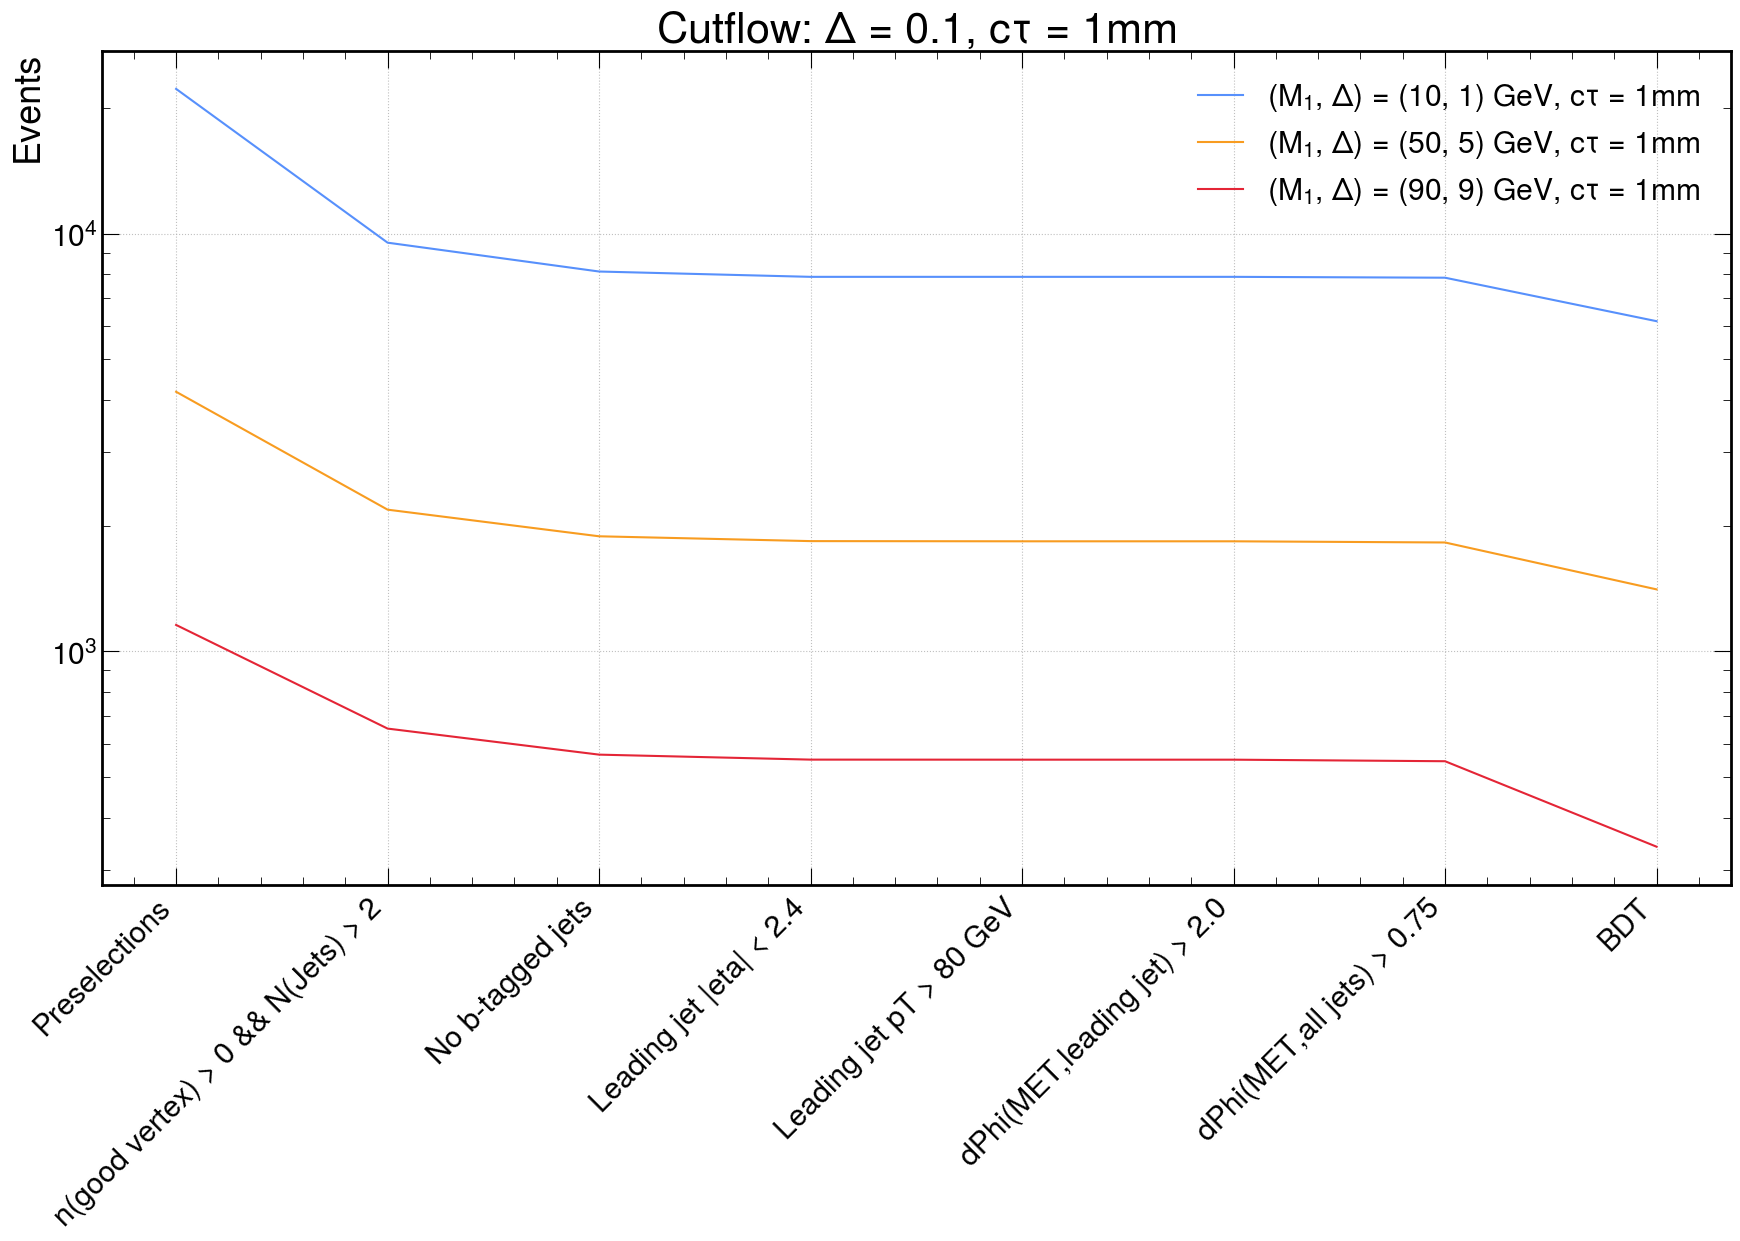

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_10_m50to100.png


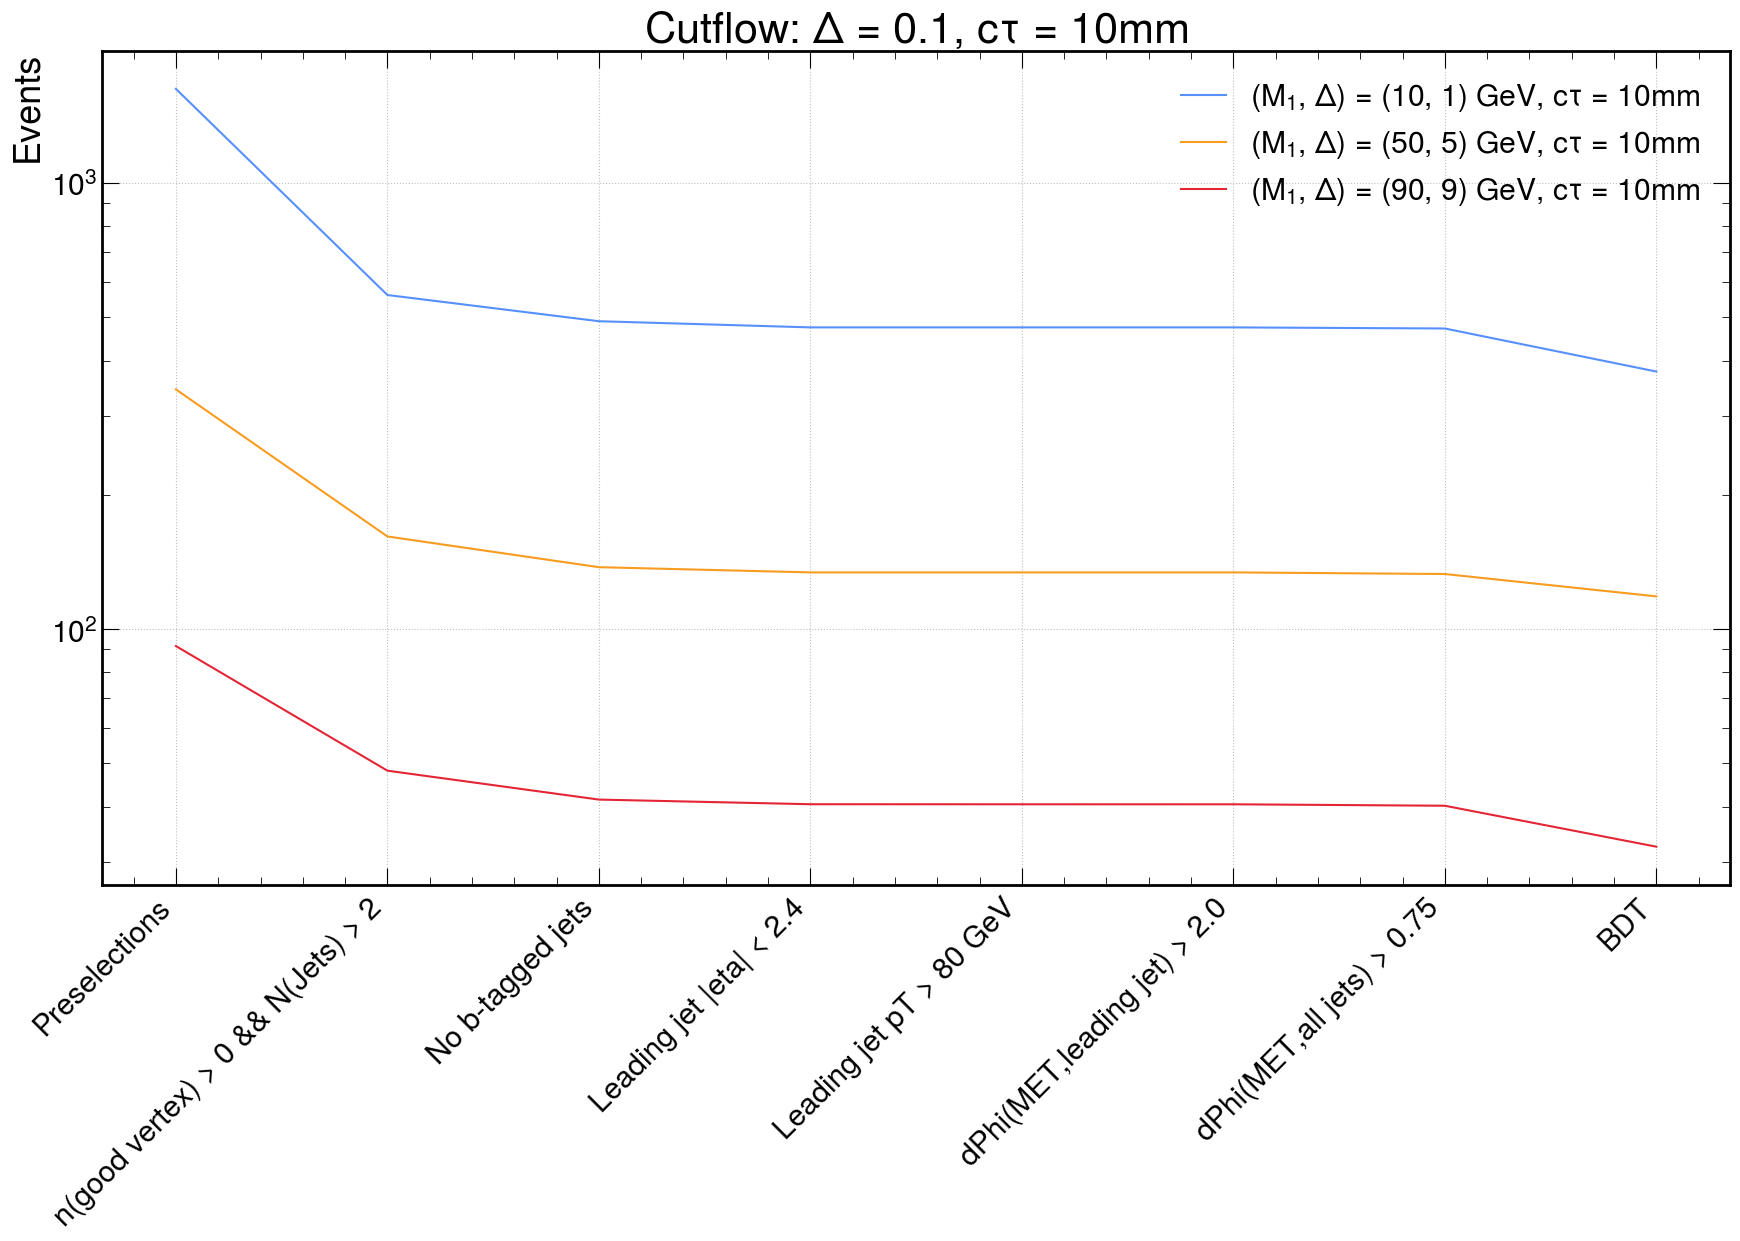

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p1_ct_100_m50to100.png


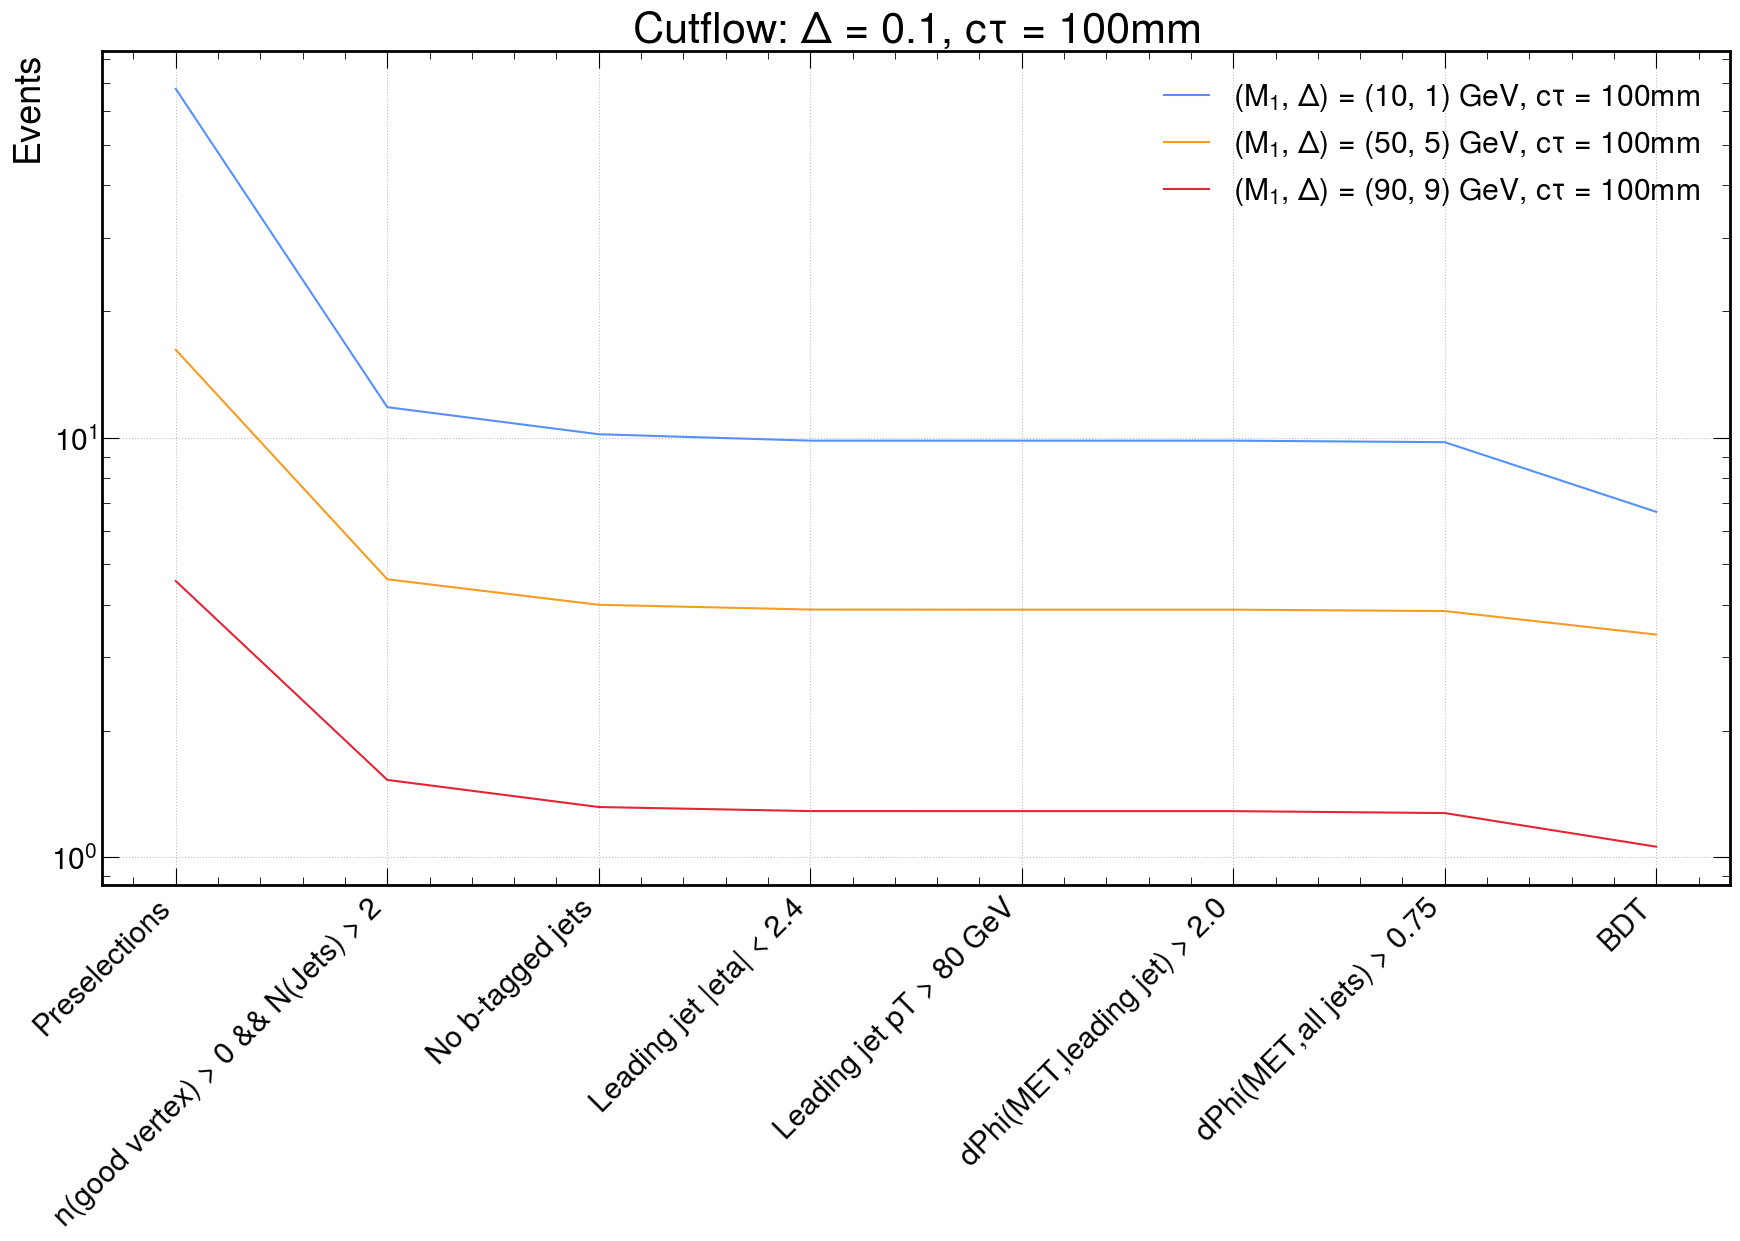

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_1_m50to100.png


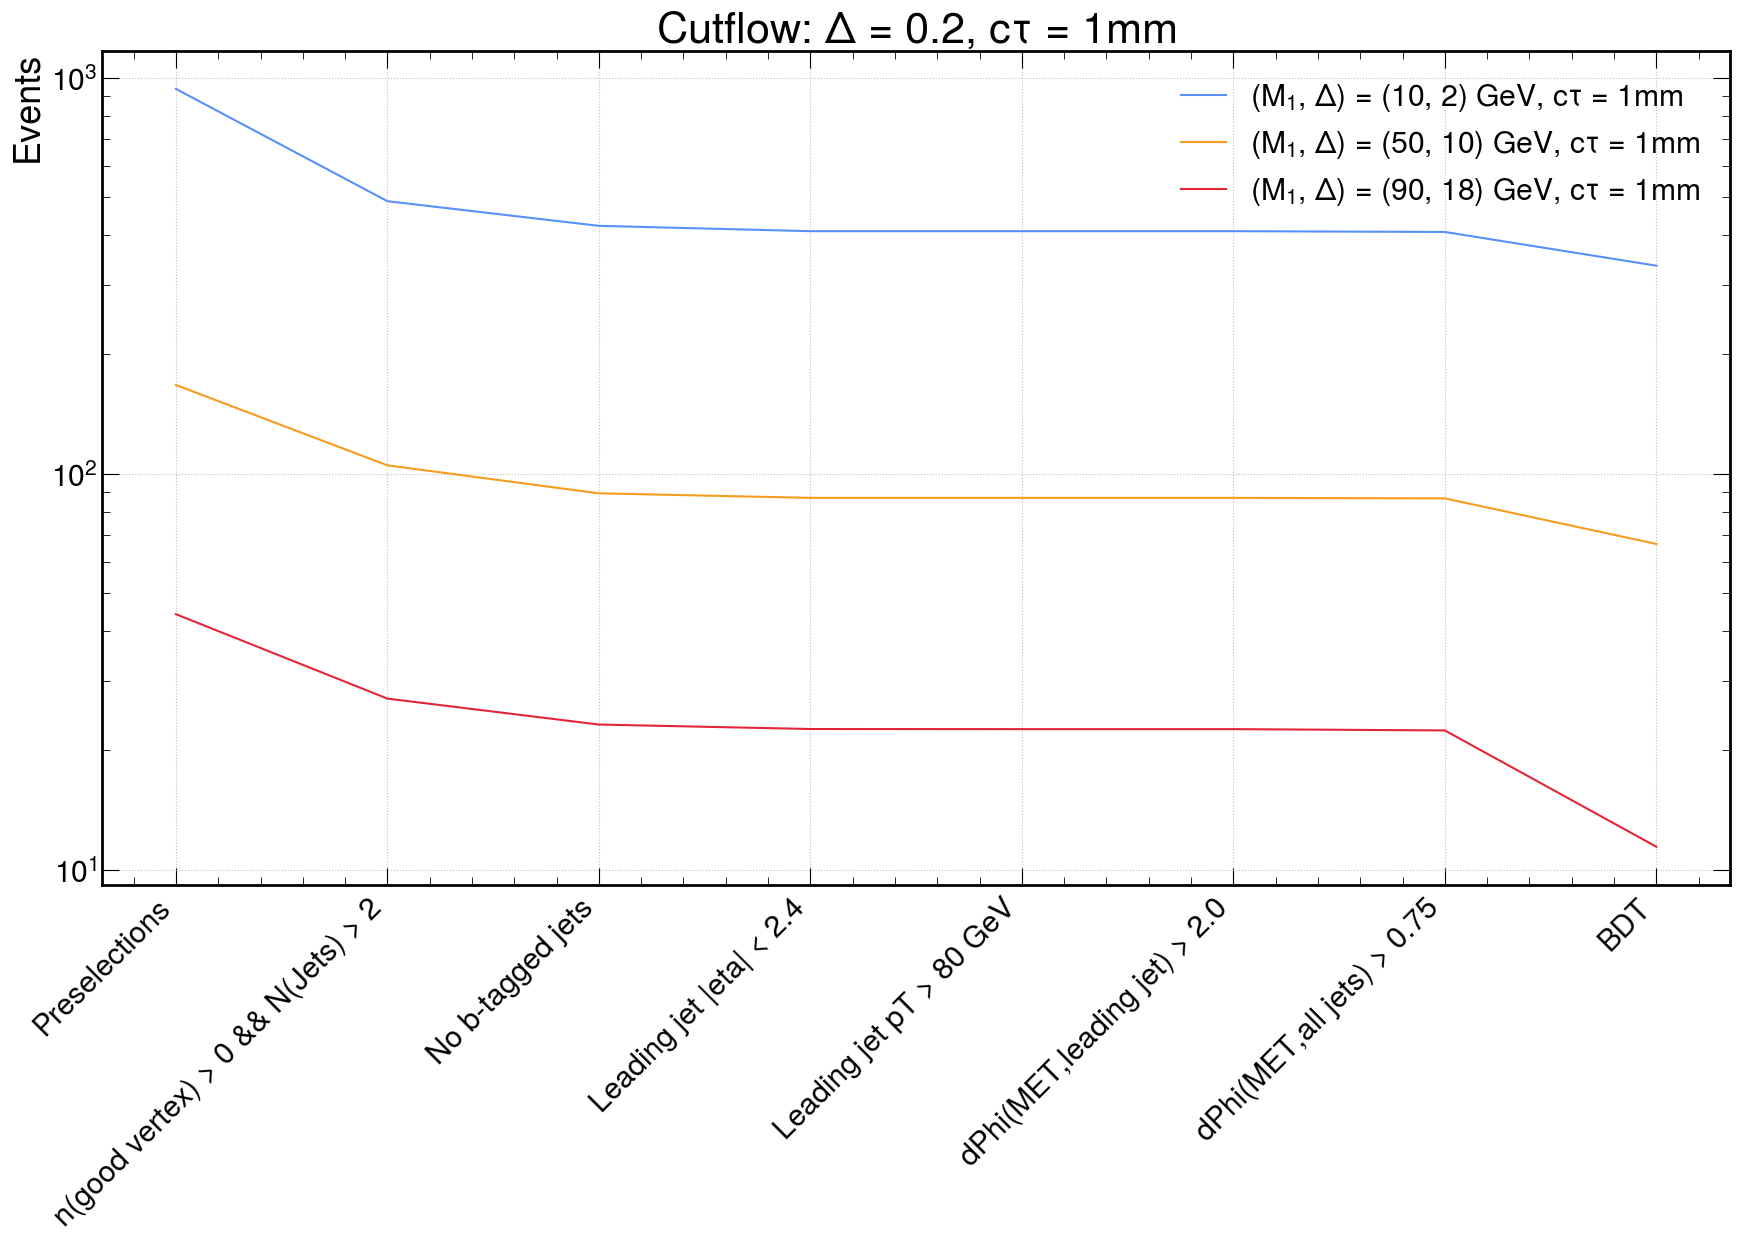

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_10_m50to100.png


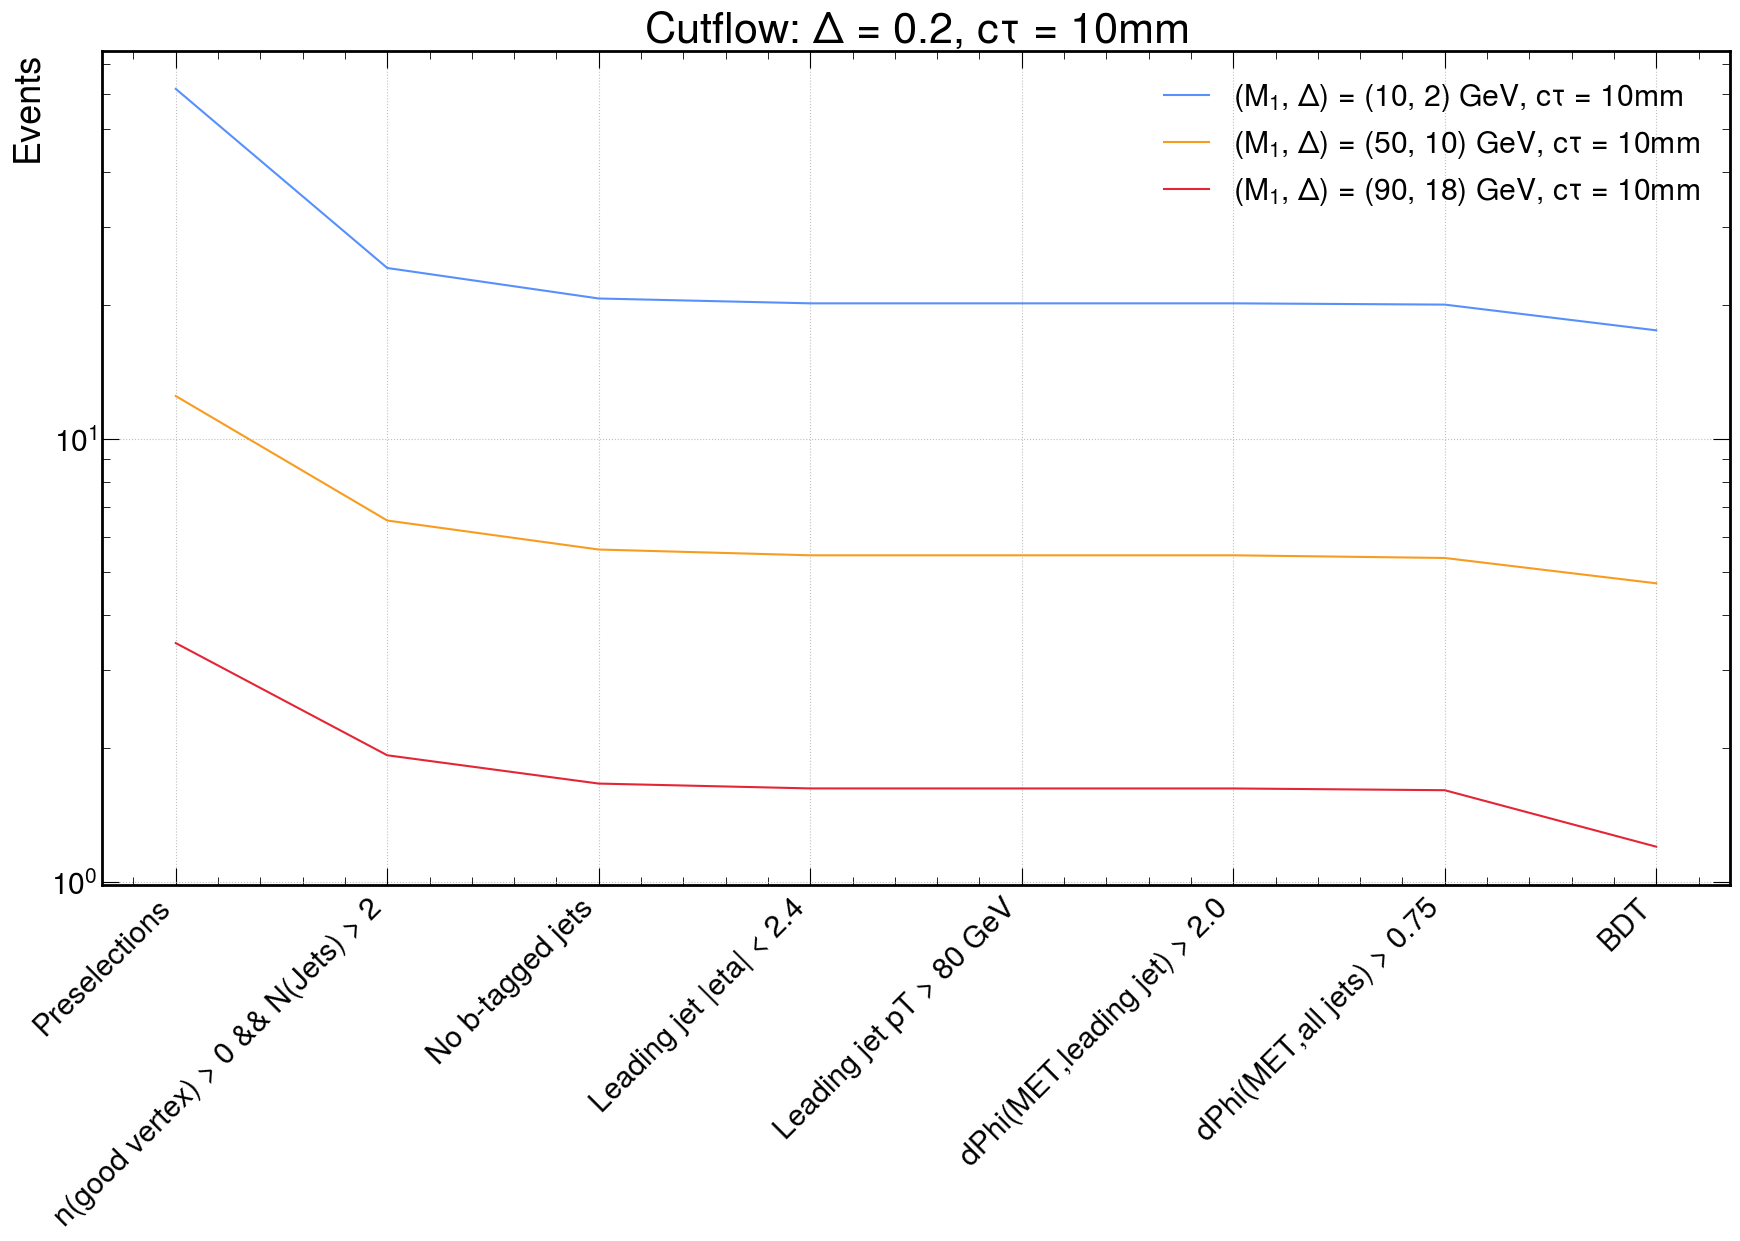

['Preselections', 'n(good vertex) > 0 && N(Jets) > 2', 'No b-tagged jets', 'Leading jet |eta| < 2.4', 'Leading jet pT > 80 GeV', 'dPhi(MET,leading jet) > 2.0', 'dPhi(MET,all jets) > 0.75', 'BDT']
Saved: ./plots/cutflow//Cutflow_SR_signal_delta_0p2_ct_100_m50to100.png


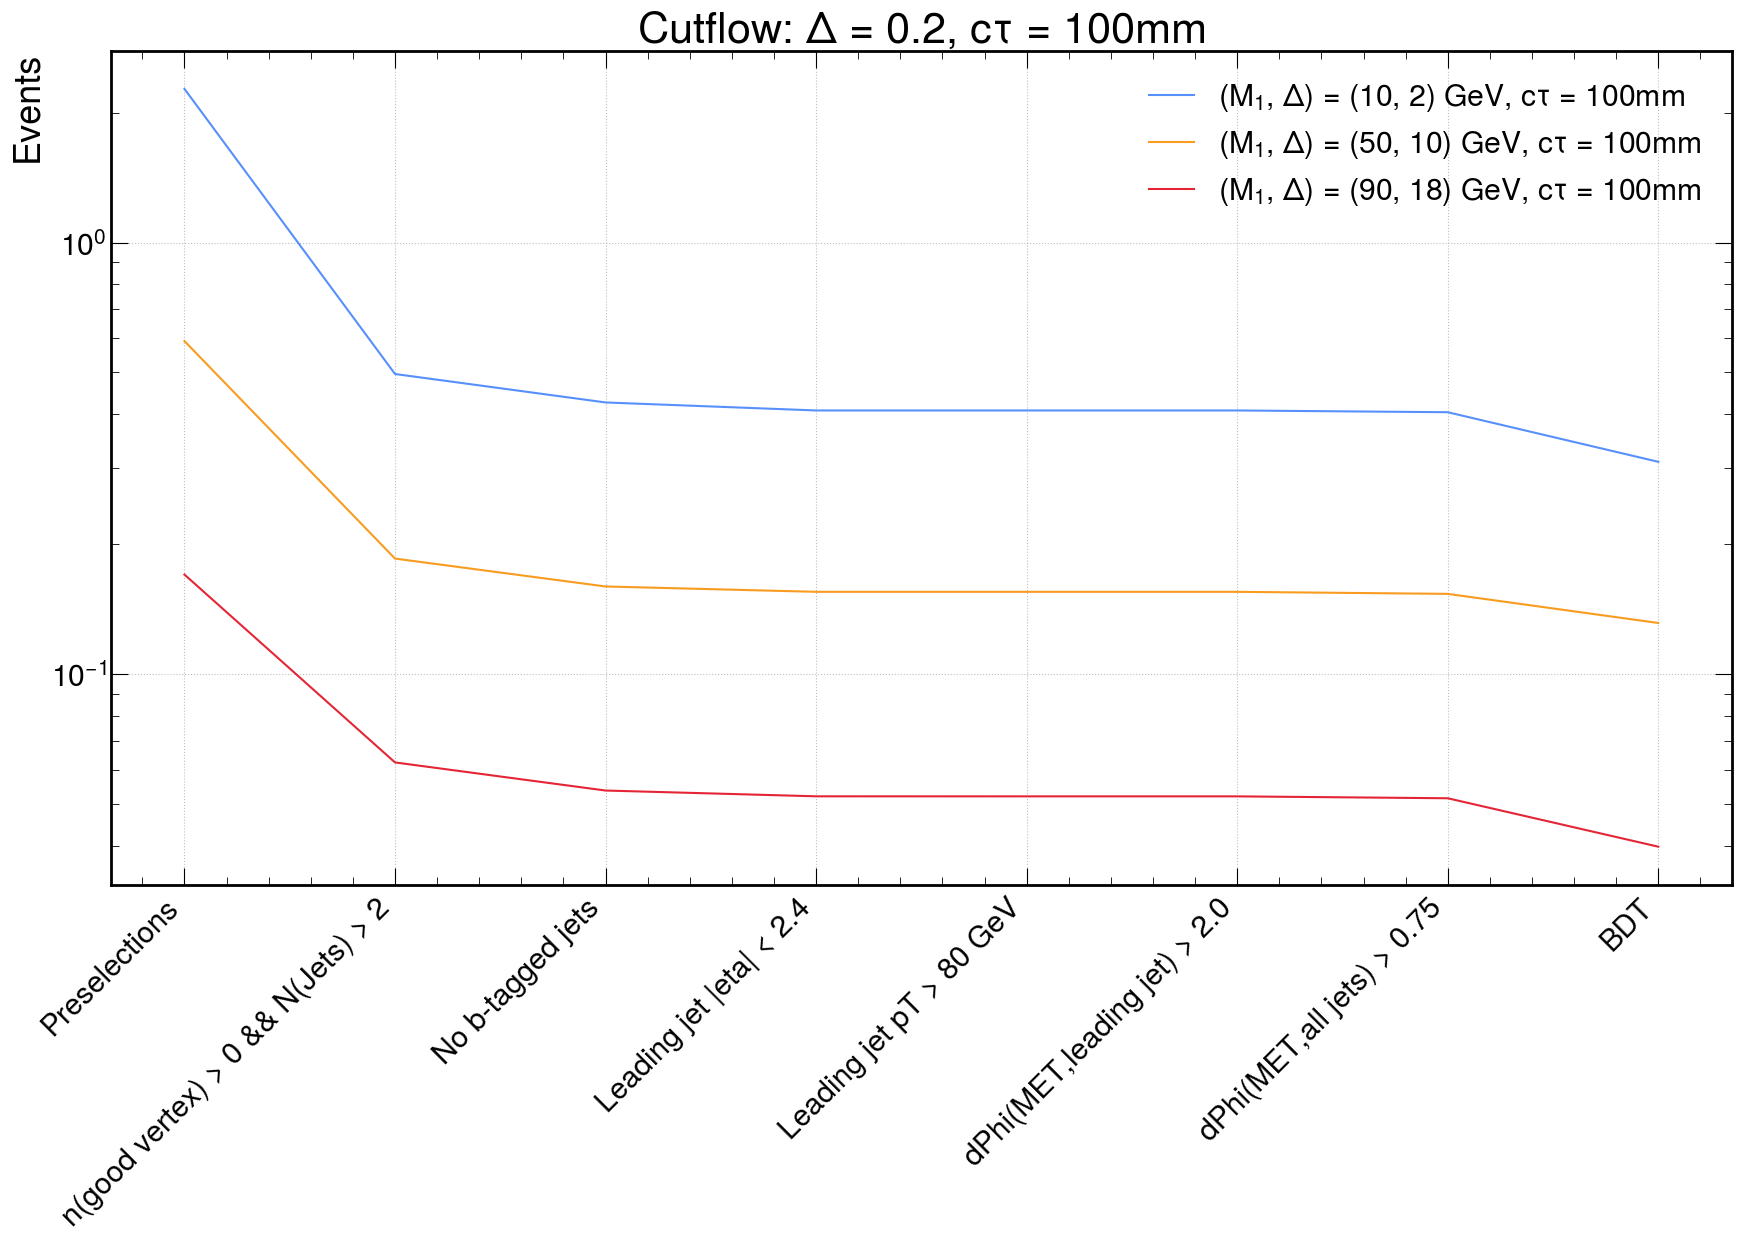

In [57]:
df = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')

fig, axes = plt.subplots()

plot_dict_sig_eff = {
    # Select signal points to display
    'm1s': [10, 50, 90],
    'deltas': [0.1, 0.2],
    'ctaus': [1, 10, 100],

    # Plot display styling
    'ylim': None, # None for default; otherwise [ymin, ymax]
    'doLog': True,
    
    'ylabel': 'Events', # None for default
    'title': rf"Cutflow", 

    # Plot saving
    'doSave': True,
    'outDir': './plots/cutflow/',
    'outName': ''
}

# Delta 0.1 1mm

for delta in [0.1, 0.2]:
    for ctau in [1, 10, 100]:
        plot_dict_sig_eff['deltas'] = [delta]
        plot_dict_sig_eff['ctaus'] = [ctau]
        
        plot_dict_sig_eff['title'] = rf"Cutflow: $\Delta$ = {delta}, c$\tau$ = {ctau}mm"
        plot_dict_sig_eff['outName'] = rf"Cutflow_SR_signal_delta_{str(delta).replace('.', 'p')}_ct_{ctau}_m50to100.png"
        
        ptools.plot_signal_efficiency(sig_histo, df, plot_dict_sig_eff)

## S/B

In [30]:
bkg_cts_df = utils.get_bkg_cutflow_df(bkg_histo, 'cutflow_cts')
nBkg = bkg_cts_df.loc['Total'][-1]

nBkg

48.24689894040104

In [31]:
cts_cutflow = utils.get_signal_cutflow_dict(sig_histo, 'cutflow_cts')
table = cts_cutflow

cutnames = utils.get_signal_list_of_cuts(sig_histo)
table.columns = cutnames

In [32]:
pd.options.display.float_format = '{:,.4f}'.format


In [33]:
df = pd.DataFrame(table.loc[:, cutnames[-1]]) # last cut
df = utils.add_signal_info_to_df(df)
df

BDT       m1  delta     ctau
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1     5,763.8972   5.0000 0.1000   1.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        438.9285   5.0000 0.2000   1.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      291.6066   5.0000 0.1000  10.0000
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100       4.2718   5.0000 0.1000 100.0000
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        19.5672   5.0000 0.2000  10.0000
...                                            ...      ...    ...      ...
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10      0.9219 100.0000 0.2000  10.0000
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1       8.1866 100.0000 0.2000   1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1     246.7066 100.0000 0.1000   1.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100     0.8531 100.0000 0.1000 100.0000
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     25.3387 100.0000 0.1000  10.0000

[62 rows x 4 columns]

In [34]:
# Missing rows
#df[ (df['m1'] == 60) & (df['delta'] == 0.2) ]

df.loc[len(df.index)] = [0, 60, 0.2, 1]
df.loc[len(df.index)] = [0, 60, 0.2, 10]
df.loc[len(df.index)] = [0, 60, 0.2, 100]
df.loc[len(df.index)] = [0, 80, 0.2, 1] 

df = df.sort_values(by=['m1']) # sort by m1

In [35]:
df = df.rename(columns={df.columns[0]: 'Signal'})

df['Background'] = nBkg
df['S/sqrt(B)'] = df['Signal'] / np.sqrt(df['Background'])

df = df[['m1', 'delta', 'ctau', 'Signal', 'Background', 'S/sqrt(B)']]

df

m1  delta     ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       5.0000 0.1000   1.0000 5,763.8972   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        5.0000 0.2000   1.0000   438.9285   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      5.0000 0.1000  10.0000   291.6066   
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100     5.0000 0.1000 100.0000     4.2718   
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10       5.0000 0.2000  10.0000    19.5672   
...                                          ...    ...      ...        ...   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1   100.0000 0.2000   1.0000     8.1866   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1   100.0000 0.1000   1.0000   246.7066   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100 100.0000 0.1000 100.0000     0.8531   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  100.0000 0.1000  10.0000    25.3387   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  100.0000 0.2000  10.0000     0.9219   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1         48.2469   829.8155  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1          48.2469    63.1916  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10        48.2469    41.9820  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100       48.2469     0.6150  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10         48.2469     2.8170  
...                                             ...        ...  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1       48.2469     1.1786  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1       48.2469    35.5178  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100     48.2469     0.1228  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10      48.2469     3.6480  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10      48.2469     0.1327  

[66 rows x 6 columns]

In [36]:
outdir = './csv/SR_Yields/'
outname = f'SR_S_over_B'

df_to_save = df

utils.save_df_to_csv(df_to_save, outdir, outname)

Saved: ./csv/SR_Yields//SR_S_over_B.csv


In [37]:
ct = 1.0


In [38]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1      5.0   0.1  1.0 5,763.8972   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1     10.0   0.1  1.0 6,175.5571   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1     20.0   0.1  1.0 5,883.1065   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1     30.0   0.1  1.0 6,993.0510   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1     40.0   0.1  1.0 3,472.3647   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1     50.0   0.1  1.0 1,407.5536   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1     60.0   0.1  1.0   868.3716   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1     70.0   0.1  1.0   612.9964   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1     80.0   0.1  1.0   438.5269   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1     90.0   0.1  1.0   340.6555   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1  100.0   0.1  1.0   246.7066   

                                       Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-1       48.2469   829.8155  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-1       48.2469   889.0812  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-1       48.2469   846.9778  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-1       48.2469 1,006.7740  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-1       48.2469   499.9086  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-1       48.2469   202.6424  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-1       48.2469   125.0175  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-1       48.2469    88.2517  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-1       48.2469    63.1337  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-1       48.2469    49.0434  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-1     48.2469    35.5178

In [39]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta ctau      Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1       5.0   0.2  1.0    438.9285   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1     10.0   0.2  1.0    335.1606   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1     20.0   0.2  1.0    294.0815   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1     30.0   0.2  1.0 15,425.0176   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1     40.0   0.2  1.0    159.9473   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1    50.0   0.2  1.0     66.4486   
62                                      60.0   0.2  1.0      0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1    70.0   0.2  1.0     23.0890   
65                                      80.0   0.2  1.0      0.0000   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1    90.0   0.2  1.0     11.4270   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1  100.0   0.2  1.0      8.1866   

                                       Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-1        48.2469    63.1916  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-1       48.2469    48.2523  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-1       48.2469    42.3383  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-1       48.2469 2,220.7055  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-1       48.2469    23.0273  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-1      48.2469     9.5665  
62                                        48.2469     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-1      48.2469     3.3241  
65                                        48.2469     0.0000  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-1      48.2469     1.6451  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-1     48.2469     1.1786

In [40]:
ct = 10.0


In [41]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta  ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10      5.0   0.1  10.0   291.6066   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10     10.0   0.1  10.0   377.8247   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10     20.0   0.1  10.0   451.8519   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10     30.0   0.1  10.0 4,669.6188   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10     40.0   0.1  10.0   296.4024   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10     50.0   0.1  10.0   118.3740   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10     60.0   0.1  10.0    77.1760   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10     70.0   0.1  10.0    56.3347   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10     80.0   0.1  10.0    41.7189   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10     90.0   0.1  10.0    32.5133   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10  100.0   0.1  10.0    25.3387   

                                        Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-10       48.2469    41.9820  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-10       48.2469    54.3946  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-10       48.2469    65.0521  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-10       48.2469   672.2746  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-10       48.2469    42.6724  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-10       48.2469    17.0420  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-10       48.2469    11.1109  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-10       48.2469     8.1104  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-10       48.2469     6.0062  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-10       48.2469     4.6809  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-10     48.2469     3.6480

In [42]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta  ctau     Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10       5.0   0.2  10.0    19.5672   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10     10.0   0.2  10.0    17.5555   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10     20.0   0.2  10.0    19.1682   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10     30.0   0.2  10.0 3,585.6837   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10     40.0   0.2  10.0    11.5792   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10    50.0   0.2  10.0     4.7168   
63                                       60.0   0.2  10.0     0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10    70.0   0.2  10.0     2.1210   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10    80.0   0.2  10.0     1.5345   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10    90.0   0.2  10.0     1.2005   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10  100.0   0.2  10.0     0.9219   

                                        Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-10        48.2469     2.8170  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-10       48.2469     2.5274  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-10       48.2469     2.7596  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-10       48.2469   516.2229  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-10       48.2469     1.6670  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-10      48.2469     0.6791  
63                                         48.2469     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-10      48.2469     0.3053  
sig_2018_Mchi-88p0_dMchi-16p0_ctau-10      48.2469     0.2209  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-10      48.2469     0.1728  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-10     48.2469     0.1327

In [43]:
ct = 100.0


In [44]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.1
delta = 0.1

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta   ctau     Signal  \
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100      5.0   0.1  100.0     4.2718   
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100     10.0   0.1  100.0     6.6557   
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100     20.0   0.1  100.0     9.8304   
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100     30.0   0.1  100.0 1,515.5477   
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100     40.0   0.1  100.0     7.4452   
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100     50.0   0.1  100.0     3.3927   
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100     60.0   0.1  100.0     2.2876   
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100     70.0   0.1  100.0     1.6095   
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100     80.0   0.1  100.0     1.3169   
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100     90.0   0.1  100.0     1.0588   
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100  100.0   0.1  100.0     0.8531   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p25_dMchi-0p5_ctau-100       48.2469     0.6150  
sig_2018_Mchi-10p5_dMchi-1p0_ctau-100       48.2469     0.9582  
sig_2018_Mchi-21p0_dMchi-2p0_ctau-100       48.2469     1.4153  
sig_2018_Mchi-31p5_dMchi-3p0_ctau-100       48.2469   218.1900  
sig_2018_Mchi-42p0_dMchi-4p0_ctau-100       48.2469     1.0719  
sig_2018_Mchi-52p5_dMchi-5p0_ctau-100       48.2469     0.4884  
sig_2018_Mchi-63p0_dMchi-6p0_ctau-100       48.2469     0.3293  
sig_2018_Mchi-73p5_dMchi-7p0_ctau-100       48.2469     0.2317  
sig_2018_Mchi-84p0_dMchi-8p0_ctau-100       48.2469     0.1896  
sig_2018_Mchi-94p5_dMchi-9p0_ctau-100       48.2469     0.1524  
sig_2018_Mchi-105p0_dMchi-10p0_ctau-100     48.2469     0.1228

In [45]:
pd.options.display.float_format = '{:,.4f}'.format

# S/sqrt(B) in ctau = 1mm, delta = 0.2
delta = 0.2

df_to_show = df[ (df.ctau == ct) & (df.delta == delta) ]
df_to_show.loc[:, 'm1'] = df_to_show.loc[:, 'm1'].map('{:,.1f}'.format)
df_to_show.loc[:, 'delta'] = df_to_show.loc[:, 'delta'].map('{:,.1f}'.format)
df_to_show.loc[:, 'ctau'] = df_to_show.loc[:, 'ctau'].map('{:,.1f}'.format)

df_to_show

m1 delta   ctau   Signal  \
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100       5.0   0.2  100.0   0.3033   
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100     10.0   0.2  100.0   0.3102   
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100     20.0   0.2  100.0   0.4281   
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100     30.0   0.2  100.0 106.2738   
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100     40.0   0.2  100.0   0.3141   
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100    50.0   0.2  100.0   0.1312   
64                                        60.0   0.2  100.0   0.0000   
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100    70.0   0.2  100.0   0.0642   
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100    80.0   0.2  100.0   0.0535   
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100    90.0   0.2  100.0   0.0398   
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100  100.0   0.2  100.0   0.0332   

                                         Background  S/sqrt(B)  
sig_2018_Mchi-5p5_dMchi-1p0_ctau-100        48.2469     0.0437  
sig_2018_Mchi-11p0_dMchi-2p0_ctau-100       48.2469     0.0447  
sig_2018_Mchi-22p0_dMchi-4p0_ctau-100       48.2469     0.0616  
sig_2018_Mchi-33p0_dMchi-6p0_ctau-100       48.2469    15.3000  
sig_2018_Mchi-44p0_dMchi-8p0_ctau-100       48.2469     0.0452  
sig_2018_Mchi-55p0_dMchi-10p0_ctau-100      48.2469     0.0189  
64                                          48.2469     0.0000  
sig_2018_Mchi-77p0_dMchi-14p0_ctau-100      48.2469     0.0092  
sig_2018_Mchi-88p0_dMchi-16p0_ctau-100      48.2469     0.0077  
sig_2018_Mchi-99p0_dMchi-18p0_ctau-100      48.2469     0.0057  
sig_2018_Mchi-110p0_dMchi-20p0_ctau-100     48.2469     0.0048